# Census Income

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [4]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [5]:
df.info

<bound method DataFrame.info of        Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   

In [6]:
df.describe

<bound method NDFrame.describe of        Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband 

In [7]:
df.corr

<bound method DataFrame.corr of        Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
df.shape

(32560, 15)

In [10]:
df.duplicated().sum()

24

In [11]:
df=df.drop_duplicates()

In [12]:
df.shape

(32536, 15)

In [13]:
cat_feat = df.select_dtypes(include=['object']).columns
cat_feat

Index(['Workclass', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native_country', 'Income'],
      dtype='object')

In [14]:
print('% of missing values :')
for c in cat_feat:
    perc = len(df[df[c] == '?']) / df.shape[0] * 100
    print(c, f'{perc:.1f} %')

% of missing values :
Workclass 0.0 %
Education 0.0 %
Marital_status 0.0 %
Occupation 0.0 %
Relationship 0.0 %
Race 0.0 %
Sex 0.0 %
Native_country 0.0 %
Income 0.0 %


In [15]:
df.describe()


Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [16]:
print(f"Ratio above 50k : {(df['Income'] == '>50k').astype('int').sum() / df.shape[0] * 100 :.2f}%")

Ratio above 50k : 0.00%


In [17]:
num_feat = df.select_dtypes(include=['int64']).columns
num_feat

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week'],
      dtype='object')

<Figure size 1600x1000 with 0 Axes>

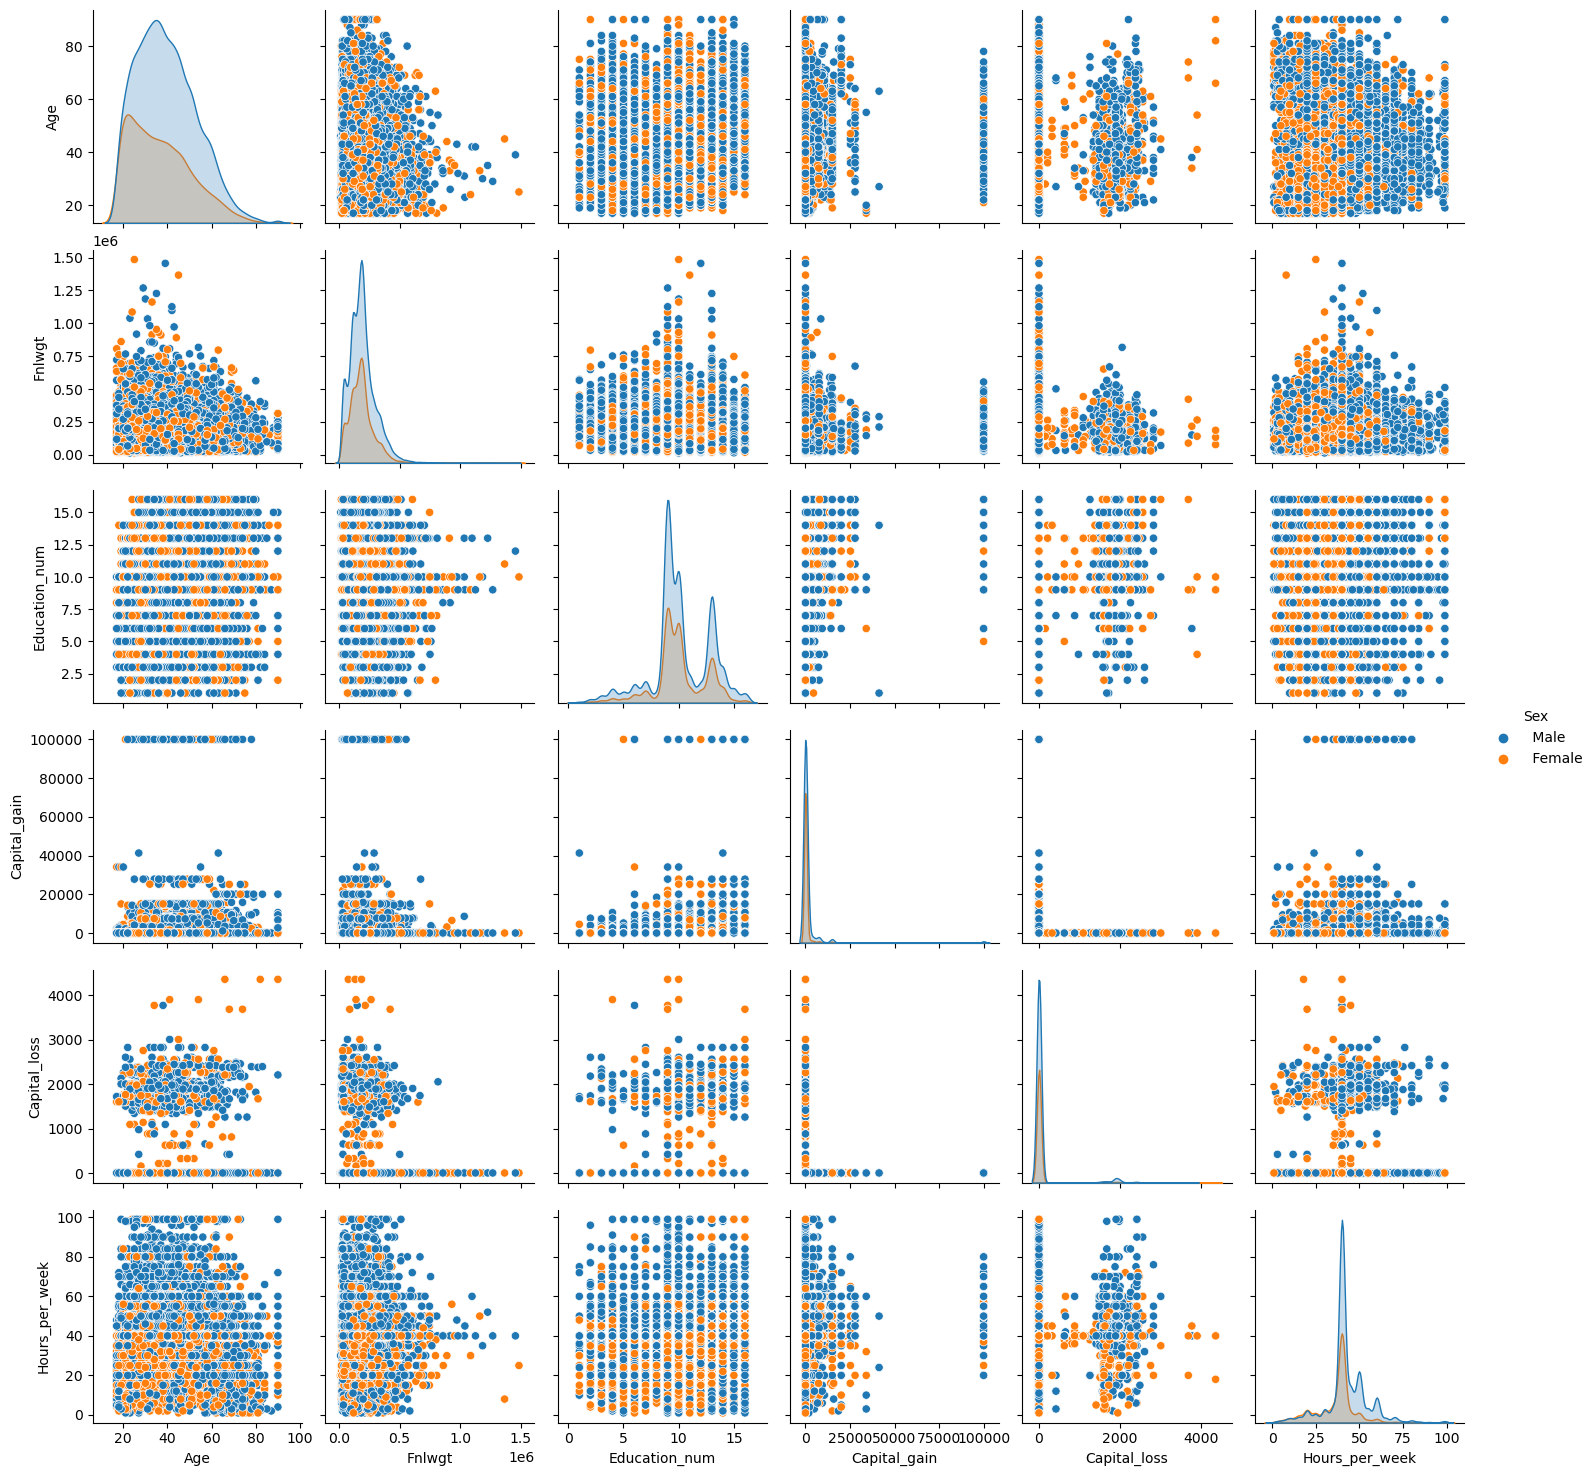

In [18]:
plt.figure(1, figsize=(16,10))
sns.pairplot(data=df, hue='Sex')
plt.show()

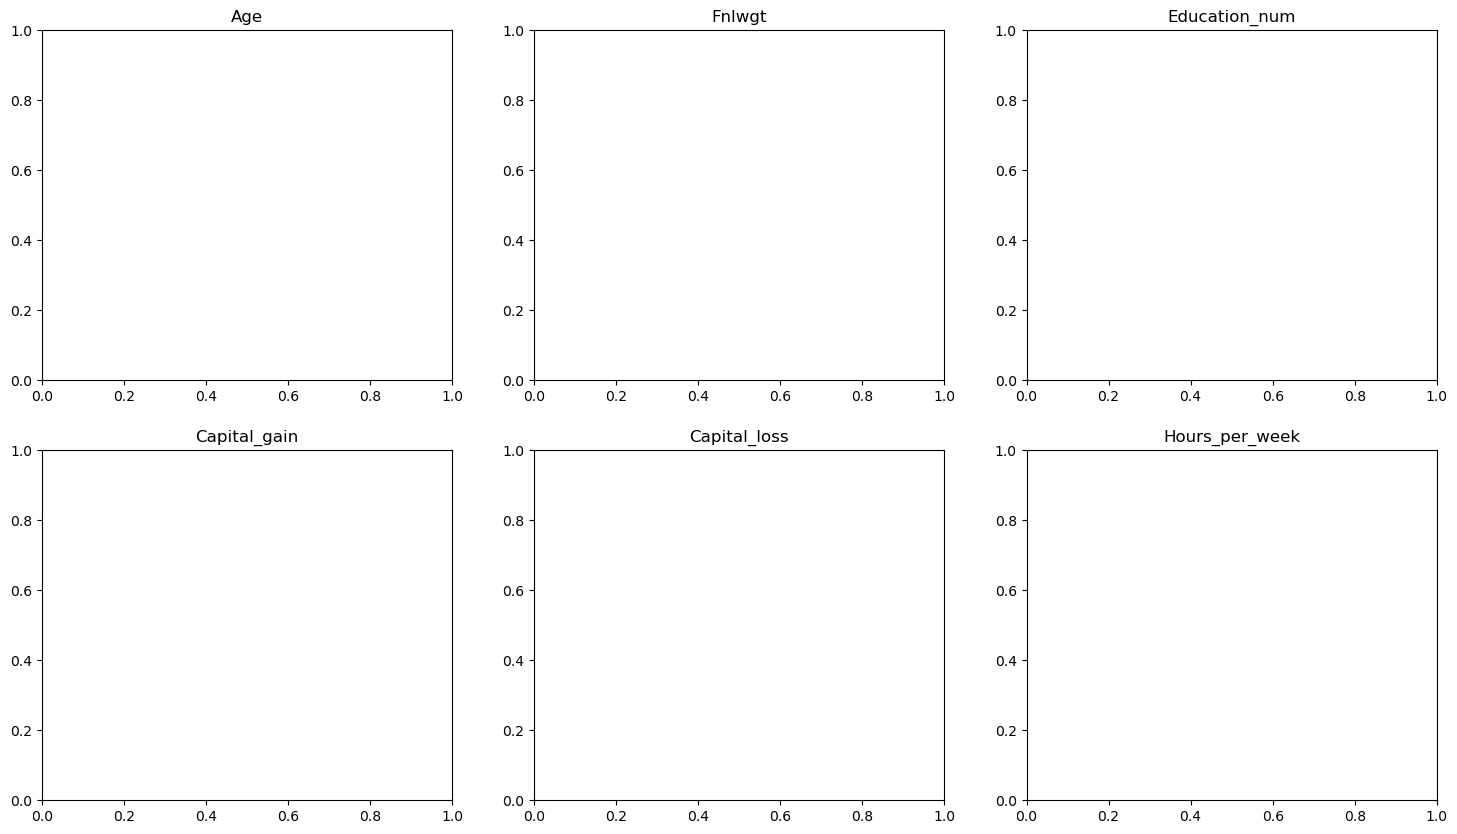

In [19]:
plt.figure(figsize=(18,10))
plt.subplot(231)

i=0
for c in num_feat:
    plt.subplot(2, 3, i+1)
    i+=1
    sns.kdeplot(df[df['Sex'] == 'Female'][c],shade=True, )
    sns.kdeplot(df[df['Sex'] == 'Male'][c], shade=False)
    plt.title(c)
    
plt.show()

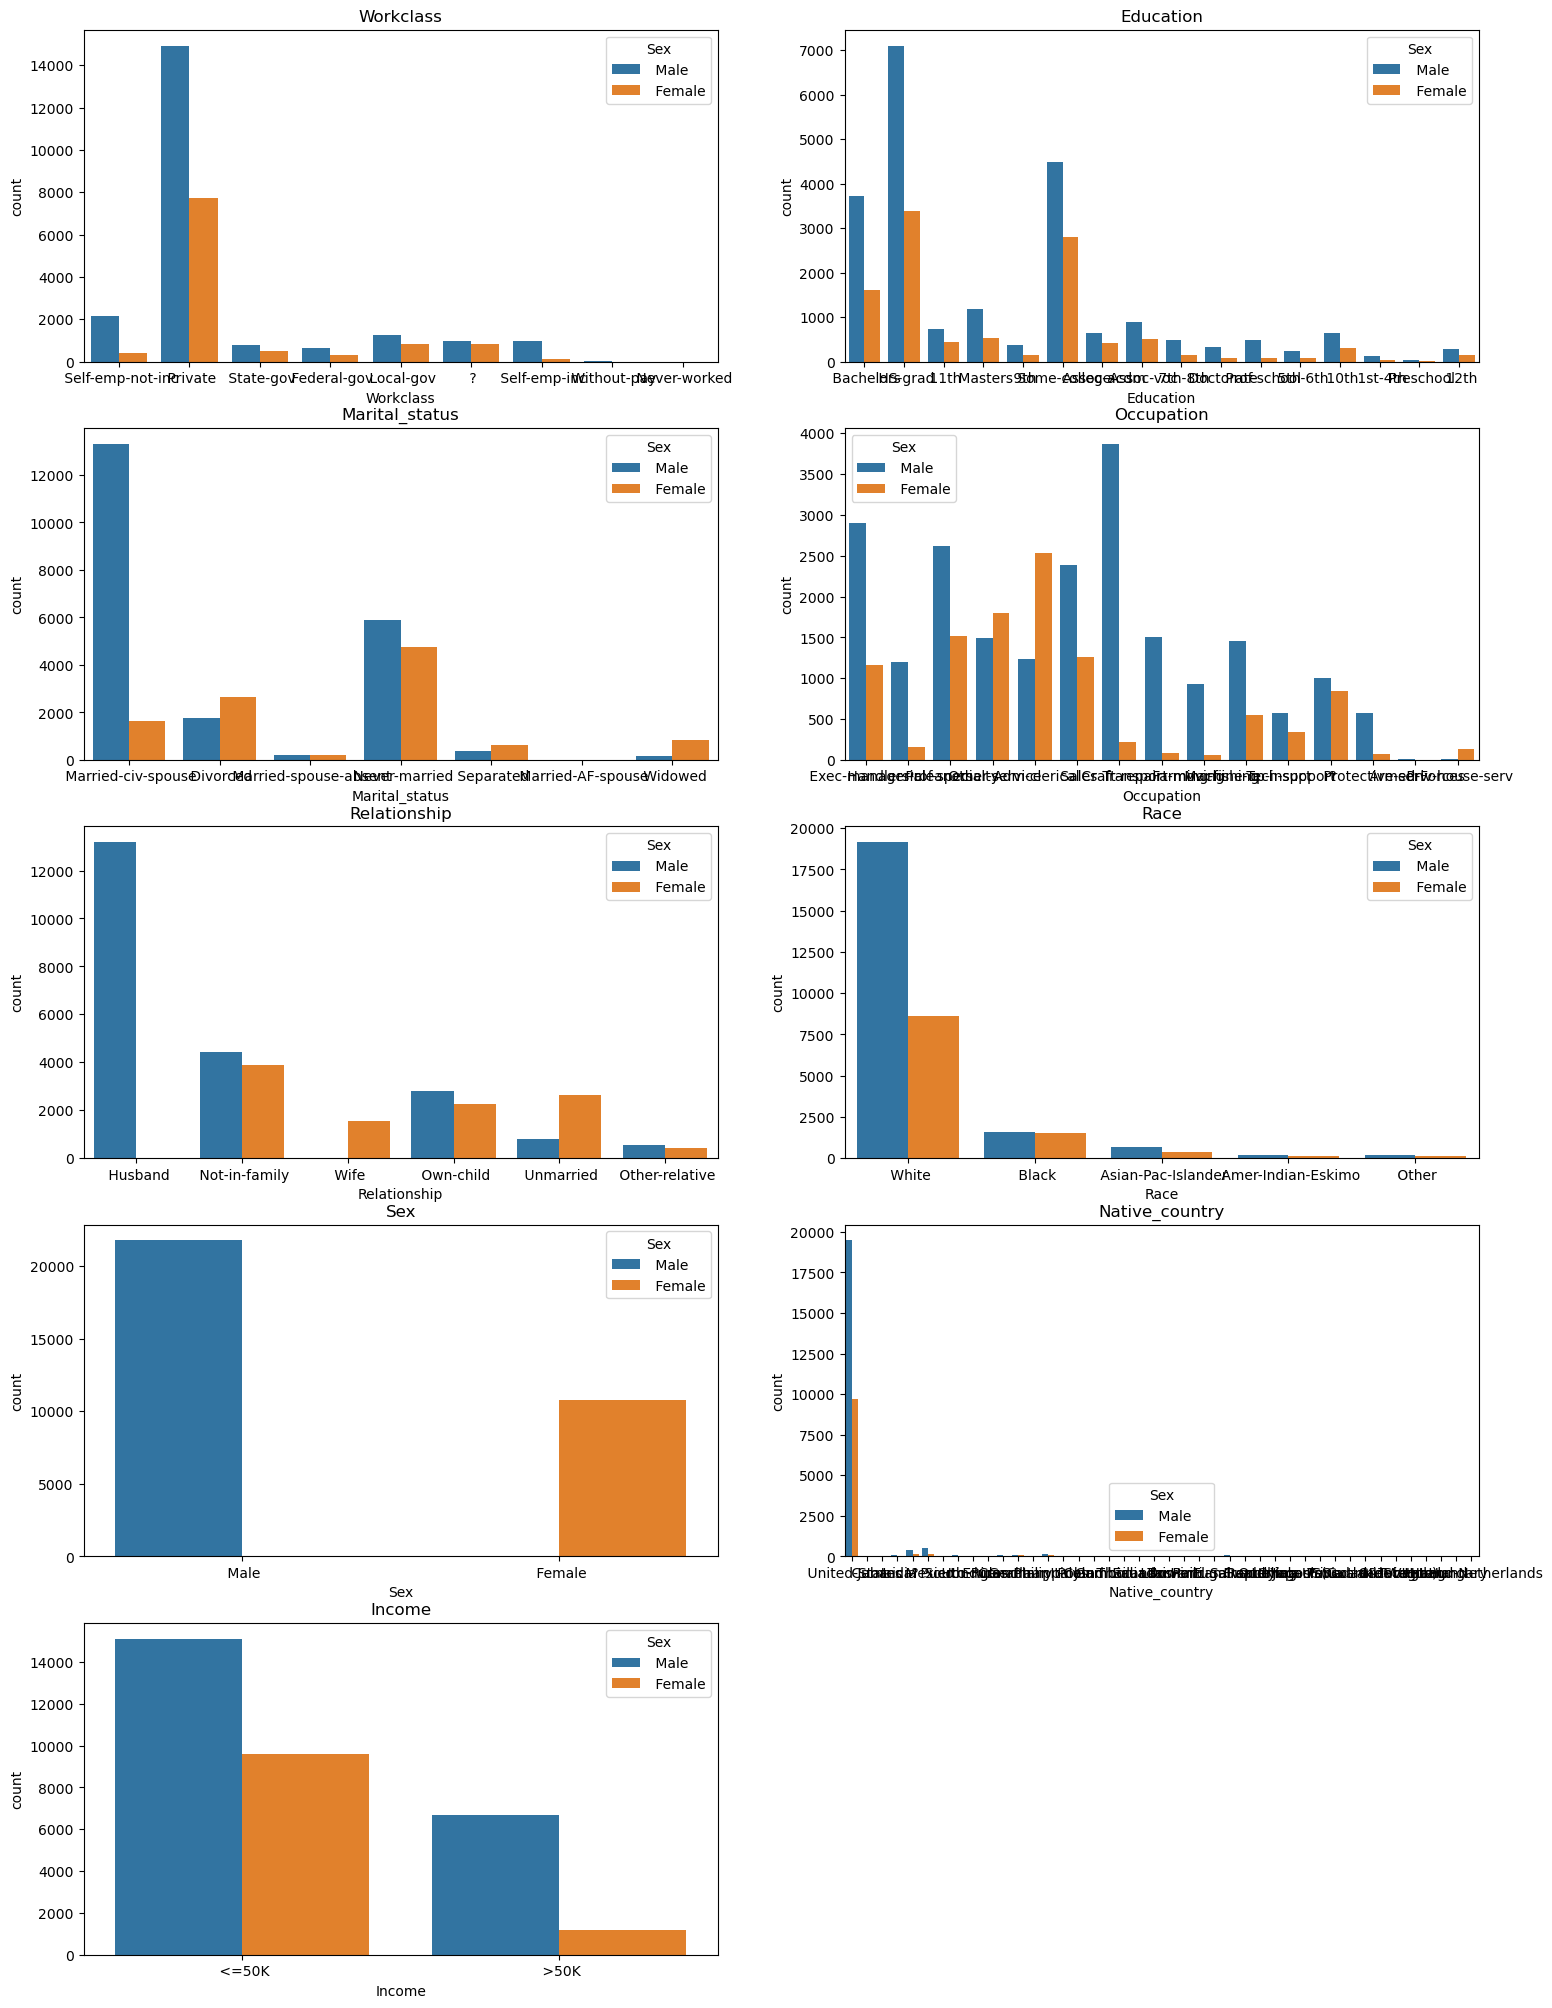

In [20]:
plt.figure(figsize=(18,25))
plt.subplot(521)

i=0
for c in cat_feat:
    plt.subplot(5, 2, i+1)
    i += 1
    sns.countplot(x=c, data=df, hue='Sex')
    plt.title(c)
    
    
plt.show()

In [21]:
nb_female = (df.Sex == 'Female').astype('int').sum()
nb_male = (df.Sex == 'Male').astype('int').sum()
nb_female, nb_male

(0, 0)

In [22]:
nb_male_above = len(df[(df.Income == '>50k') & (df.Sex == 'Male')])
nb_male_below = len(df[(df.Income == '<=50k') & (df.Sex == 'Male')])
nb_female_above = len(df[(df.Income == '>50k') & (df.Sex == 'Female')])
nb_female_below = len(df[(df.Income == '<=50k') & (df.Sex == 'Female')])
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(0, 0, 0, 0)

In [23]:
print(f'Among Males : {nb_male_above/nb_male*100:.0f}% earn >50k // {nb_male_below/nb_male*100:.0f}% earn <=50k')
print(f'Among Females : {nb_female_above/nb_female*100:.0f}% earn >50k // {nb_female_below/nb_female*100:.0f}% earn <=50k')

Among Males : nan% earn >50k // nan% earn <=50k
Among Females : nan% earn >50k // nan% earn <=50k


In [24]:
nb_male_above /= nb_male
nb_male_below /= nb_male
nb_female_above /= nb_female
nb_female_below /=nb_female
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(nan, nan, nan, nan)

In [25]:
print(f'Among people earning >50k : {nb_male_above / (nb_male_above + nb_female_above) *100 :.0f}% are Females and {nb_female_above / (nb_male_above + nb_female_above) *100 :.0f}% are Males')
print(f'Among people earning =<50k : {nb_male_below/ (nb_male_below + nb_female_below) *100 :.0f}% are Female and {nb_female_below / (nb_male_below + nb_female_below) *100 :.0f}% are mMles')

Among people earning >50k : nan% are Females and nan% are Males
Among people earning =<50k : nan% are Female and nan% are mMles


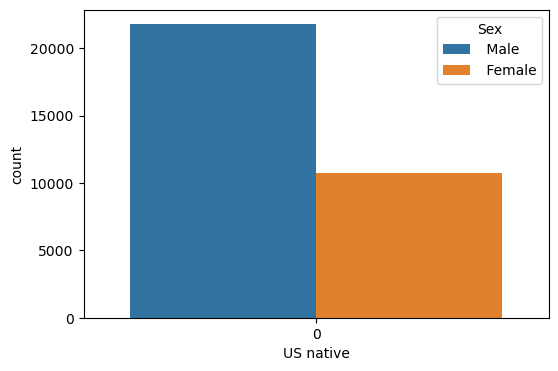

In [26]:
df['US native'] = (df['Native_country'] == 'United-States').astype('int')
plt.figure(figsize=(6,4))
sns.countplot(x='US native', data=df, hue='Sex')
plt.show()

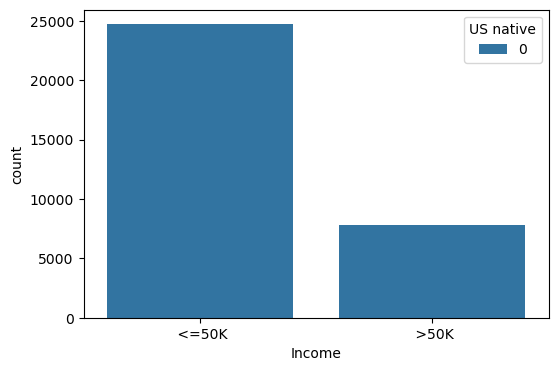

In [27]:
plt.figure(figsize=(6,4))
sns.countplot(x='Income',data=df, hue='US native')
plt.show()

In [28]:
nb_native_above = len(df[(df.Income == '>50k') & (df['US native'] == 1)])
nb_native_below = len(df[(df.Income == '<=50k') & (df['US native'] == 1)])
nb_foreign_above = len(df[(df.Income == '>50k') & (df['US native'] == 0)])
nb_foreign_below = len(df[(df.Income == '<=50k') &(df['US native'] == 0)])
nb_native_above, nb_native_below, nb_foreign_above, nb_foreign_below

(0, 0, 0, 0)

In [29]:
nb_native = (df['US native'] == 1).astype('int').sum()
nb_foreign = df.shape[0] - nb_native
nb_native, nb_foreign

(0, 32536)

In [30]:
print(f'Among natives : {nb_native_above/nb_native*100:.0f}% earn >50k // {nb_native_below/nb_native*100:.0f}%earn <=50k')
print(f'Among foreigners : {nb_foreign_above/nb_foreign*100:.0f}%earn >50k // {nb_foreign_below/nb_foreign*100:.0f}% earn <=50k')      

Among natives : nan% earn >50k // nan%earn <=50k
Among foreigners : 0%earn >50k // 0% earn <=50k


In [31]:
nb_native_above /= nb_native
nb_native_below /= nb_native
nb_foreign_above /= nb_foreign
nb_foreign_below /= nb_foreign
nb_native_above, nb_native_below, nb_foreign_above, nb_foreign_below

(nan, nan, 0.0, 0.0)

In [32]:
print(f'Among people earning >50k : {nb_native_above / (nb_native_above + nb_foreign_above) *100:.0f}% are natives and {nb_foreign_above / (nb_native_above + nb_foreign_above) *100:.0f}% are foreigners')
print(f'Among people earning = 50k : {nb_native_below / (nb_native_below + nb_foreign_below) *100:.0f}% are natives and {nb_foreign_below / (nb_native_below +nb_foreign_below)*100:.0f}% are foreigners')

Among people earning >50k : nan% are natives and nan% are foreigners
Among people earning = 50k : nan% are natives and nan% are foreigners


In [33]:
num_feat = df.select_dtypes(include=['float', 'int']).columns
num_feat

Index(['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss',
       'Hours_per_week', 'US native'],
      dtype='object')

<AxesSubplot:>

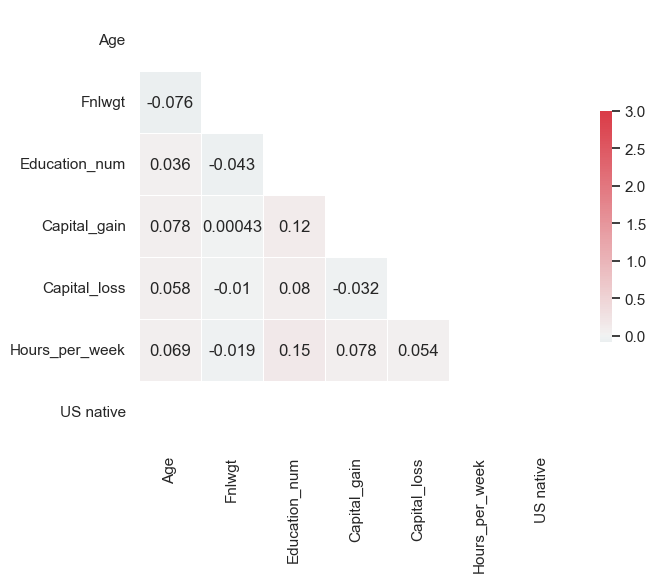

In [34]:
sns.set(style="white")

corr = df[num_feat].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=3, center=0,
           square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})


In [35]:
df['Income'] = pd.get_dummies(df['Income'], prefix='Income', drop_first=True)

In [36]:
y= df.Income
df = df.drop(columns=['Income'])

In [37]:
print(f'Ratio above 50k : {y.sum()/len(y)*100:.2f}%')

Ratio above 50k : 24.09%


In [38]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  US native  
0             0             0              13   United-States          0  
1             0             0              40   United-States          0  
2             0             0              40   United-States          0  
3             0             0              40            Cuba          0  
4             0             0              40   United-States          0

In [39]:
cols = list(df.columns)
cols

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'US native']

In [40]:
selected_feat = cols.copy()
selected_feat.remove('US native')
selected_feat

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country']

In [41]:
df_final = df[selected_feat]

In [42]:
cat_feat = df_final.select_dtypes(include=['object']).columns
x = pd.get_dummies(df_final[cat_feat], drop_first=True)

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import roc_auc_score, mean_squared_error, accuracy_score, classification_report, roc_curve, confusion_matrix
from sklearn.feature_selection import RFE

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [45]:
def print_score(model, name):
    model.fit(x_train, y_train)
    print('Accuracy score of the', name, f': on train = {model.score(x_train, y_train)*100:.2f}%, on test = {model.score(x_test, y_test)*100:.2f}%')

In [46]:
print_score(LogisticRegression(), 'LogisticReg')

Accuracy score of the LogisticReg : on train = 83.33%, on test = 82.73%


In [47]:
print_score(DecisionTreeClassifier(), 'DecisionTreeClf')

Accuracy score of the DecisionTreeClf : on train = 86.75%, on test = 81.61%


In [52]:
rf = RandomForestClassifier().fit(x_train, y_train)
print(f'Accuracy scoreof the RandomForrest: on train = {rf.score(x_train, y_train)*100:.2f}%, on test = {rf.score(x_test, y_test)*100:.2f}%')

Accuracy scoreof the RandomForrest: on train = 86.75%, on test = 81.88%


In [53]:
print_score(DecisionTreeClassifier(), 'ExtraTreeClf')

Accuracy score of the ExtraTreeClf : on train = 86.75%, on test = 81.50%


In [54]:
rfc = RandomForestClassifier()
param_grid = {'n_estimators': [50,100, 150, 200, 250],
             'max_features': [1,2,3,4,5],
             'max_depth': [4,6,8]
             
}

In [55]:
rfc_cv = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rfc_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [56]:
GridSearchCV(cv=5, error_score='raise-deprecating',
            estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                max_depth=None, max_features='auto', max_leaf_nodes=None,
                min_impurity_decrease=0.0, min_impurity_split=None,
                min_sample_leaf=1, min_sample_split=2,
                min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
                oob_score=False),
            fit_params=None, iid='warn', n_jobs=None,
            param_grid={'n_estimators': [50, 100, 150, 200, 250], 'max_features':[1,2,3,4,5], 'max_depth': [4,6,8]},
            pre_dispatch='2*n_jobs', refit=True, return_train_score = 'warn',
            scoring=None, verbose=0)

TypeError: __init__() got an unexpected keyword argument 'min_impurity_split'

In [57]:
rfc_cv.best_params_

{'max_depth': 8, 'max_features': 5, 'n_estimators': 250}

In [58]:
rfc_best = RandomForestClassifier(max_depth=8, max_features=5, n_estimators=250).fit(x_train, y_train)
print(f'Accuracy score of the RandomForrest: on train = {rfc_best.score(x_train, y_train)*100:.2f}%,on test = {rfc_best.score(x_test, y_test)*100:.2f}%')

Accuracy score of the RandomForrest: on train = 80.37%,on test = 79.56%


In [59]:
np.argsort(rf.feature_importances_)[-16:]

array([91, 22, 36,  3, 21, 46, 18, 19, 43, 52, 16, 45, 38, 32, 26, 24],
      dtype=int64)

In [60]:
[list(x.columns)[i] for i in np.argsort(rf.feature_importances_)[-16:]][::-1]

['Marital_status_ Married-civ-spouse',
 'Marital_status_ Never-married',
 'Occupation_ Exec-managerial',
 'Occupation_ Prof-specialty',
 'Relationship_ Own-child',
 'Education_ Bachelors',
 'Sex_ Male',
 'Relationship_ Not-in-family',
 'Education_ Masters',
 'Education_ HS-grad',
 'Relationship_ Unmarried',
 'Education_ Prof-school',
 'Workclass_ Private',
 'Occupation_ Other-service',
 'Education_ Some-college',
 'Native_country_ United-States']

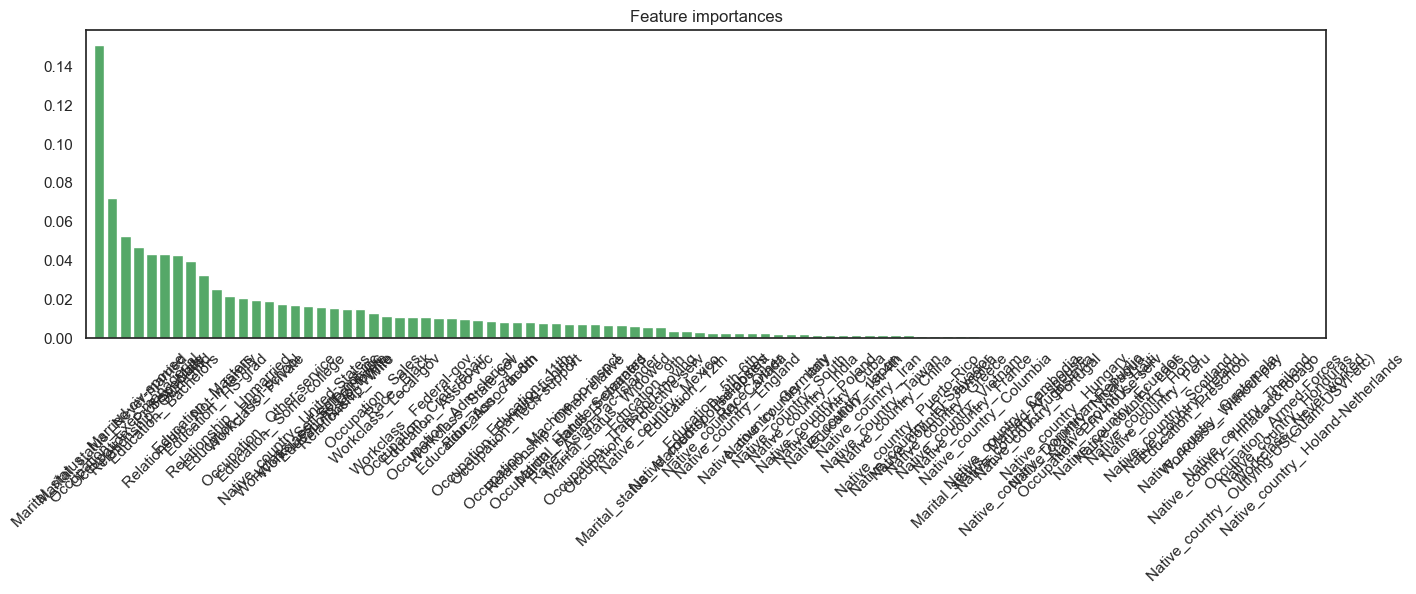

Marital_status_ Married-civ-spouse - 0.151
Marital_status_ Never-married - 0.072
Occupation_ Exec-managerial - 0.052
Occupation_ Prof-specialty - 0.047
Relationship_ Own-child - 0.044
Education_ Bachelors - 0.043
Sex_ Male - 0.043
Relationship_ Not-in-family - 0.040
Education_ Masters - 0.032
Education_ HS-grad - 0.025
Relationship_ Unmarried - 0.022
Education_ Prof-school - 0.021
Workclass_ Private - 0.020
Occupation_ Other-service - 0.019
Education_ Some-college - 0.017
Native_country_ United-States - 0.017
Workclass_ Self-emp-not-inc - 0.016
Workclass_ Self-emp-inc - 0.016
Education_ Doctorate - 0.016
Relationship_ Wife - 0.015
Race_ White - 0.015
Occupation_ Sales - 0.013
Workclass_ Local-gov - 0.011
Race_ Black - 0.011
Workclass_ Federal-gov - 0.011
Occupation_ Craft-repair - 0.011
Education_ Assoc-voc - 0.010
Occupation_ Adm-clerical - 0.010
Workclass_ State-gov - 0.010
Education_ Assoc-acdm - 0.009
Education_ 7th-8th - 0.009
Occupation_ Farming-fishing - 0.008
Occupation_ Tech-s

In [61]:
features = x.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

plt.figure(figsize=(16,4))
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

for i in indices:
    print("{0} - {1:.3f}".format(features[i], importances[i]))

<AxesSubplot:>

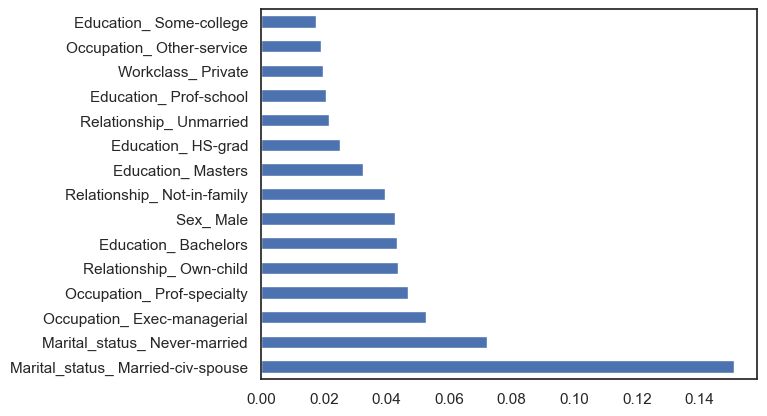

In [62]:
(pd.Series(rf.feature_importances_, index=x_train.columns)
    .nlargest(15)
    .plot(kind='barh'))

# Rainfall Weather Forecating

In [59]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import roc_auc_score, mean_squared_error, classification_report, roc_curve


In [62]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')

In [63]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [65]:
df.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0    

In [66]:
df.max

<bound method NDFrame._add_numeric_operations.<locals>.max of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0     

In [67]:
df.value_counts()

Date        Location      MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow
2016-04-26  Williamtown   14.4     23.4     0.0       2.6          7.4       ESE          31.0           NW          SE          9.0           19.0          82.0         63.0         1030.2       1027.1       4.0       1.0       19.0     22.5     No         No              2
2010-07-29  Melbourne     7.5      14.9     4.4       0.8          0.0       N            41.0           NNW         N           13.0          22.0          83.0         66.0         1016.5       1013.2       7.0       7.0       12.0     14.1     Yes        No              2
2010-07-18  Melbourne     7.1      13.6     0.0       2.2          4.0       N            65.0           N           N           41.0          20.0          71.0         75.0   

In [68]:
df.describe

<bound method NDFrame.describe of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     

In [69]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [70]:
df.corr()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.720955  0.091642     0.348643  0.081365   
MaxTemp        0.720955  1.000000 -0.088906     0.424728  0.523909   
Rainfall       0.091642 -0.088906  1.000000     0.043463 -0.209654   
Evaporation    0.348643  0.424728  0.043463     1.000000  0.340893   
Sunshine       0.081365  0.523909 -0.209654     0.340893  1.000000   
WindGustSpeed  0.241317  0.146113  0.104999     0.214069 -0.018455   
WindSpeed9am   0.137263  0.013425  0.051349     0.176701 -0.025112   
WindSpeed3pm   0.180091  0.088797  0.025185     0.142421  0.045031   
Humidity9am   -0.130906 -0.392496  0.231702    -0.286869 -0.512349   
Humidity3pm    0.079569 -0.424217  0.238730    -0.221244 -0.630536   
Pressure9am   -0.465478 -0.347285 -0.080412    -0.218171  0.028666   
Pressure3pm   -0.458665 -0.430074 -0.037270    -0.233401 -0.047098   
Cloud9am       0.111213 -0.307700  0.195157    -0.084288 -0.705577   
Cloud3pm       0.046889 -0.301675  0.159250    -0.152637 -0.723957   
Temp9am        0.888342  0.869503 -0.007191     0.405467  0.348708   
Temp3pm        0.689652  0.978665 -0.092263     0.414156  0.546057   

               WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
MinTemp             0.241317      0.137263      0.180091    -0.130906   
MaxTemp             0.146113      0.013425      0.088797    -0.392496   
Rainfall            0.104999      0.051349      0.025185     0.231702   
Evaporation         0.214069      0.176701      0.142421    -0.286869   
Sunshine           -0.018455     -0.025112      0.045031    -0.512349   
WindGustSpeed       1.000000      0.656079      0.711403    -0.286045   
WindSpeed9am        0.656079      1.000000      0.566322    -0.358981   
WindSpeed3pm        0.711403      0.566322      1.000000    -0.252488   
Humidity9am        -0.286045     -0.358981     -0.252488     1.000000   
Humidity3pm        -0.097380     -0.111595     -0.091248     0.636255   
Pressure9am        -0.430736     -0.197189     -0.291271     0.154699   
Pressure3pm        -0.394745     -0.156517     -0.240378     0.188463   
Cloud9am            0.030124     -0.000607      0.005807     0.472126   
Cloud3pm            0.104157      0.068930      0.003894     0.352736   
Temp9am             0.211477      0.109936      0.185329    -0.378389   
Temp3pm             0.106872     -0.002619      0.066201    -0.383788   

               Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
MinTemp           0.079569    -0.465478    -0.458665  0.111213  0.046889   
MaxTemp          -0.424217    -0.347285    -0.430074 -0.307700 -0.301675   
Rainfall          0.238730    -0.080412    -0.037270  0.195157  0.159250   
Evaporation      -0.221244    -0.218171    -0.233401 -0.084288 -0.152637   
Sunshine         -0.630536     0.028666    -0.047098 -0.705577 -0.723957   
WindGustSpeed    -0.097380    -0.430736    -0.394745  0.030124  0.104157   
WindSpeed9am     -0.111595    -0.197189    -0.156517 -0.000607  0.068930   
WindSpeed3pm     -0.091248    -0.291271    -0.240378  0.005807  0.003894   
Humidity9am       0.636255     0.154699     0.188463  0.472126  0.352736   
Humidity3pm       1.000000     0.001763     0.076002  0.509797  0.520221   
Pressure9am       0.001763     1.000000     0.961922 -0.091391 -0.104535   
Pressure3pm       0.076002     0.961922     1.000000 -0.015692 -0.035986   
Cloud9am          0.509797    -0.091391    -0.015692  1.000000  0.619202   
Cloud3pm          0.520221    -0.104535    -0.035986  0.619202  1.000000   
Temp9am          -0.130973    -0.441901    -0.472788 -0.161867 -0.151438   
Temp3pm          -0.491634    -0.302488    -0.394852 -0.326547 -0.348986   

                Temp9am   Temp3pm  
MinTemp        0.888342  0.689652  
MaxTemp        0.869503  0.978665  
Rainfall      -0.007191 -0.092263  
Evaporation    0.405467  0.414156  
Sunshine       0.348708  0.546057  
WindGustSpeed  0.211477  0.106872  
WindSpeed9am   0.109936 -0.002619  
Wi

In [71]:
df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0    

In [72]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [73]:
df.shape

(8425, 23)

In [74]:
pd.set_option('display.max_row',25)
pd.set_option('display.max_column',25)

In [75]:
df.dtypes.value_counts()

float64    16
object      7
dtype: int64

In [76]:
df.shape

(8425, 23)

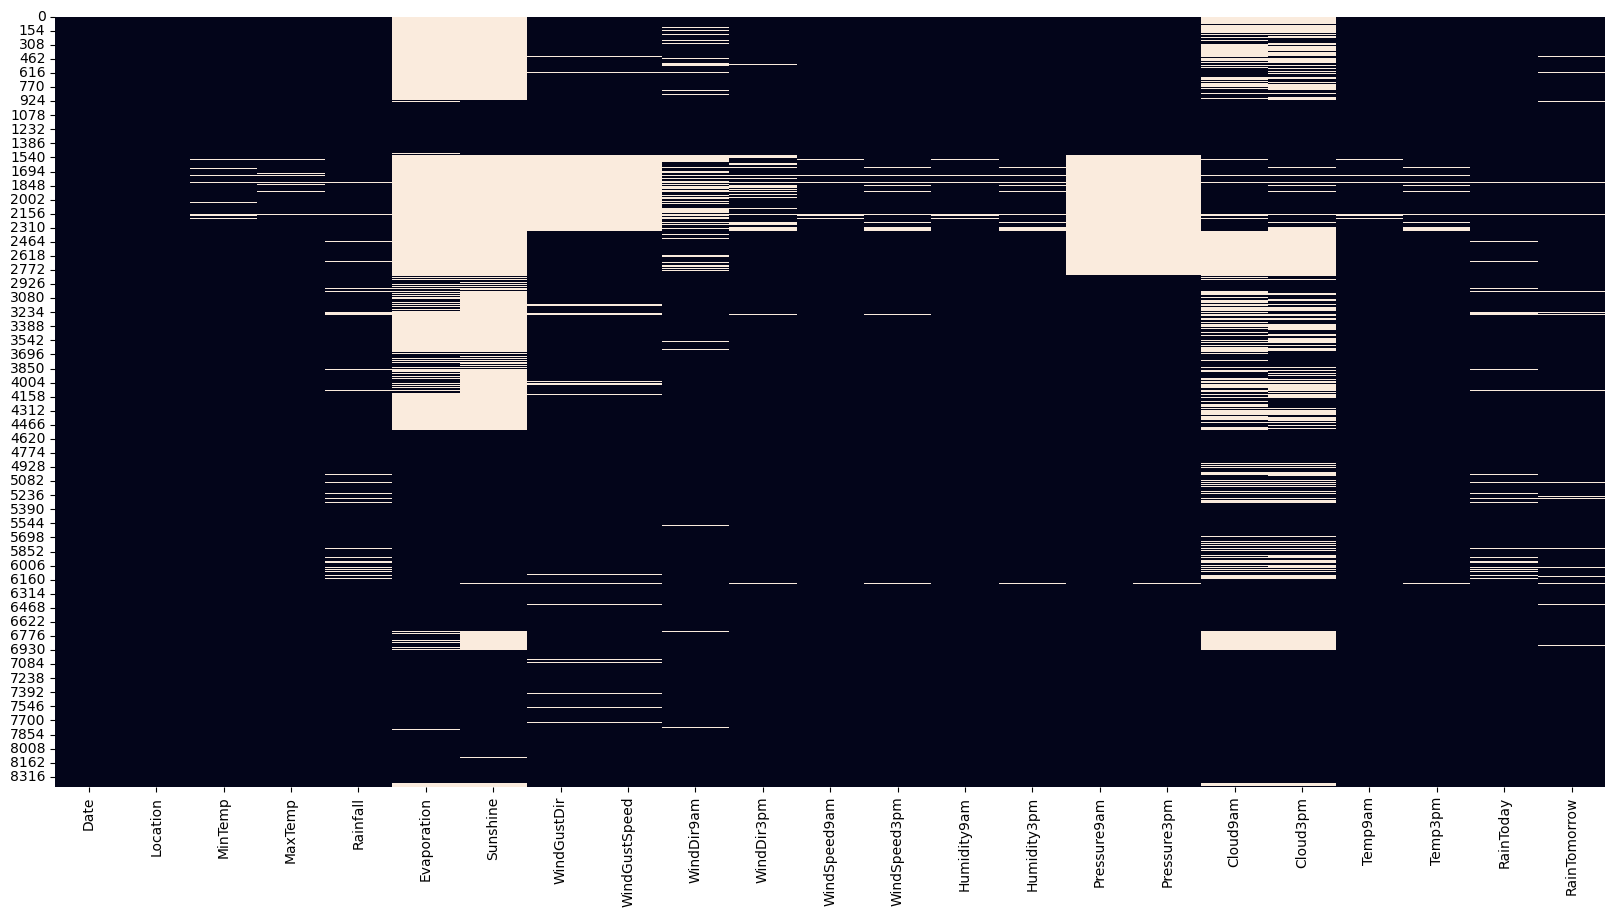

Sunshine         47.406528
Evaporation      41.685460
Cloud3pm         29.139466
Cloud9am         28.735905
Pressure3pm      15.572700
Pressure9am      15.537092
WindGustDir      11.762611
WindGustSpeed    11.762611
WindDir9am        9.839763
WindDir3pm        3.655786
RainToday         2.848665
Rainfall          2.848665
RainTomorrow      2.836795
WindSpeed3pm      1.270030
Humidity3pm       1.210682
Temp3pm           1.139466
WindSpeed9am      0.902077
MinTemp           0.890208
MaxTemp           0.712166
Humidity9am       0.700297
Temp9am           0.664688
Location          0.000000
Date              0.000000
dtype: float64


In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
plt.show()
print((df.isna().sum()/df.shape[0]*100).sort_values(ascending=False))

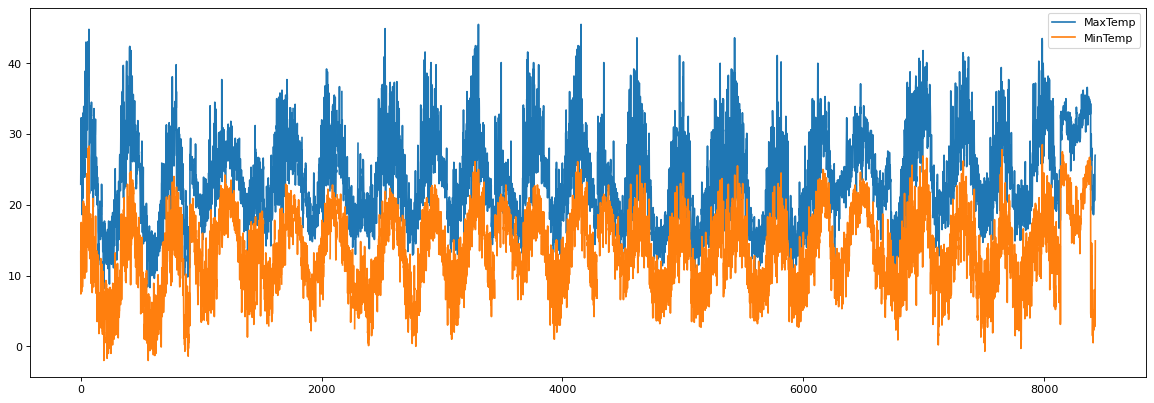

In [78]:
plt.figure(figsize=(18,6), dpi=80)
plt.plot(df["MaxTemp"],label="MaxTemp")
plt.plot(df["MinTemp"],label="MinTemp")
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

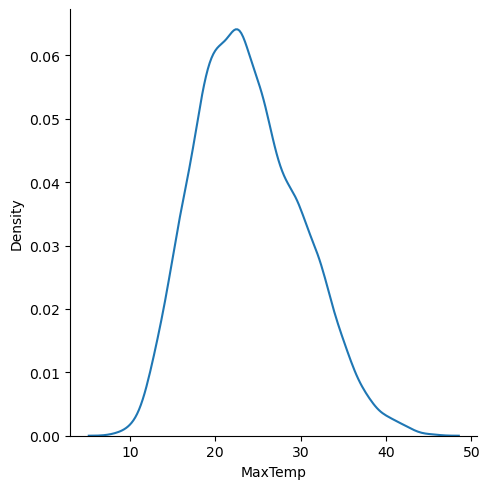

<Figure size 640x480 with 0 Axes>

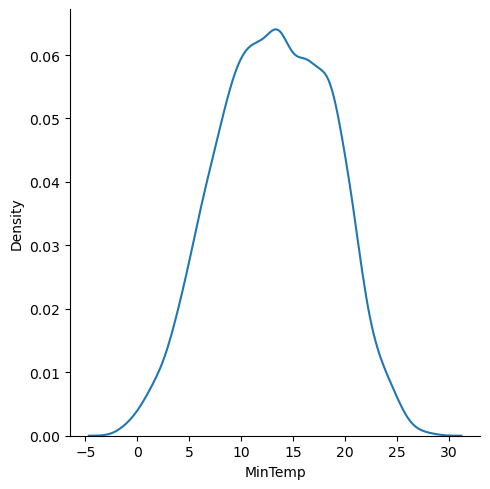

23.85997609085473
6.136407919256073
13.193305389221573
5.403596214623685


In [79]:
for col in ["MaxTemp","MinTemp"]:
    plt.figure()
    sns.displot(df[col],kind='kde')
    plt.show()
    
print(df["MaxTemp"].mean())
print(df["MaxTemp"].std())
print(df["MinTemp"].mean())
print(df["MinTemp"].std())

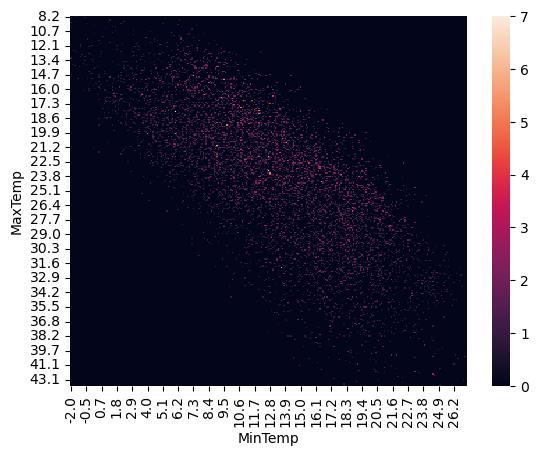

In [80]:
plt.figure()
sns.heatmap(pd.crosstab(df["MaxTemp"],df["MinTemp"]))
plt.show()


<AxesSubplot:>

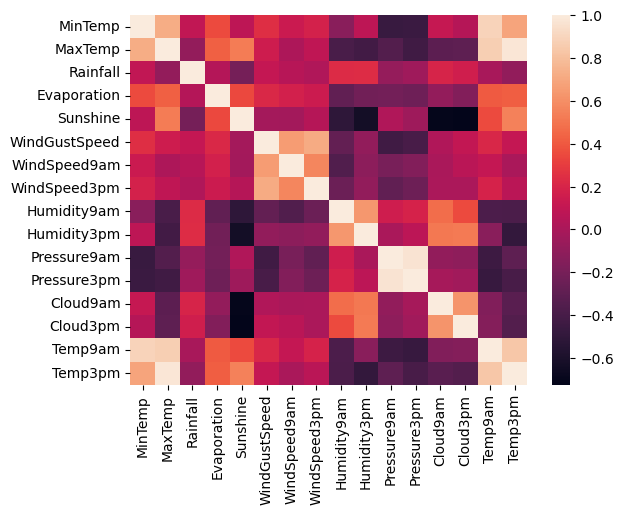

In [81]:
sns.heatmap(df.corr())

In [82]:
def feature_engineering(df):
    df = df.drop(["Date"],axis=1)
    print(df.dtypes.value_counts())
    return(df)

In [83]:
def imputation(df):
    df = df.dropna(axis=0)
    return df

In [84]:
def encodage(df):
    return df

In [85]:
def preprocessing(df):
    df = imputation(df)
    df = encodage(df)
    df = feature_engineering(df)
    
    x=df.drop(["MaxTemp","MinTemp"],axis=1)
    y_max = df["MaxTemp"]
    y_min  = df["MinTemp"]
    
    print(x.shape)
    print(y_max.shape)
    
    return x,y_max,y_min

In [86]:
trainset, testset, =train_test_split(df, test_size=0.2, random_state=0)

In [87]:
x_train, y_min_train, y_max_train = preprocessing(trainset)
x_test, y_min_test, y_max_test = preprocessing(testset)

float64    16
object      6
dtype: int64
(3062, 20)
(3062,)
float64    16
object      6
dtype: int64
(728, 20)
(728,)


In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate

In [89]:
reg_max = make_pipeline(StandardScaler(),
                    SGDRegressor(loss='squared_loss', penalty='12', max_iter=100, tol=1e-3))
reg_max.fit(x_train, y_max_train)

reg_min = make_pipeline(StandardScaler(),
                    SGDRegressor(loss='squared_loss', penalty ='12', max_iter=100, tol=1e-3))
reg_min.fit(x_train, y_min_train)

cv_results_min = cross_validate(reg_min, x_train, y_min_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)
cv_results_max = cross_validate(reg_max, x_train, y_max_train, cv=5, scoring=('r2', "neg_root_mean_squared_error"), return_train_score=True)


print('Pourle MinTemp :')
print('Test RMSE :' , -cv_results_min['test_neg_root_mean_squared_error'].mean())
print('Test r2 :', cv_results_min['test_r2'].mean())
print('Test RMSE :', -cv_results_min['train_neg_root_mean_squared_error'].mean())
print('Train r2 :', cv_results_min['train_r2'].mean())
print("*-----------------------------------------*")
print('Pour le MaxTemp :')
print('Test RMSE :', -cv_results_max['test_neg_root_mean_squared_error'].mean())
print('Test r2 :', cv_results_max['test_r2'].mean())
print('Train RMSE :', -cv_results_max['train_neg_root_mean_squared_error'].mean())
print('Train r2 :', cv_results_max['train_r2'].mean())

ValueError: could not convert string to float: 'Melbourne'

In [90]:
MinTemp = reg_min.predict(x_test)
Maxtemp = reg_max.predict(x_test)

NameError: name 'reg_min' is not defined

NameError: name 'MinTemp' is not defined

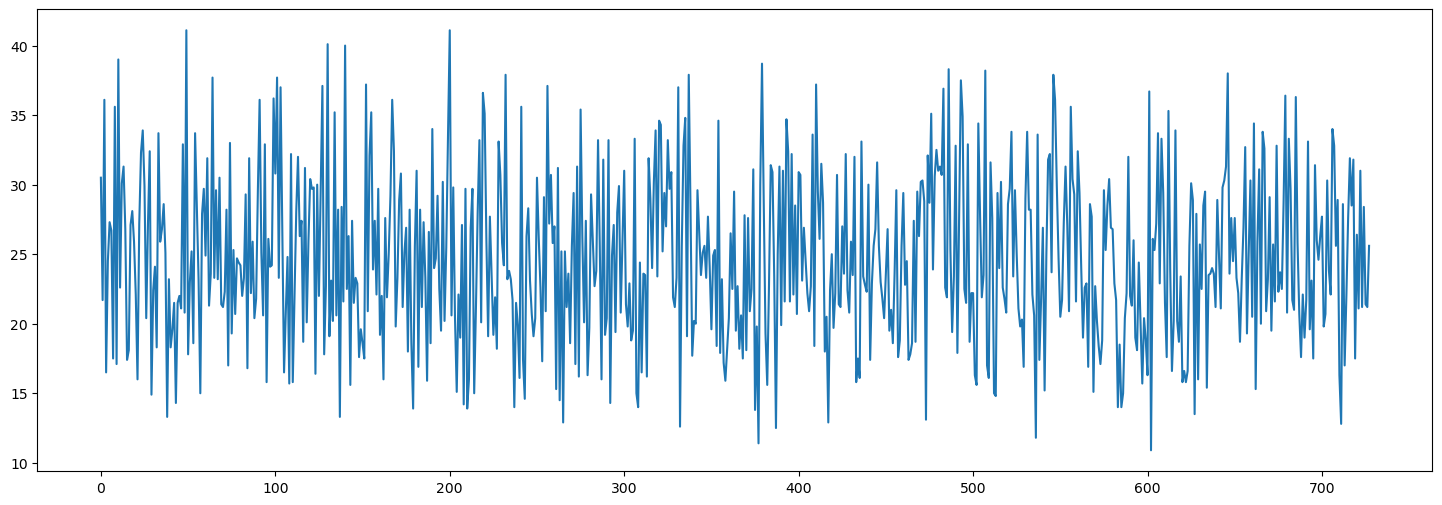

In [91]:
plt.figure(figsize=(18,6))
plt.plot(y_min_test.to_numpy(),label="MinTemp")
plt.plot(MinTemp,label="MinTemp_predict")
plt.legend()
plt.show()

plt.figure(figsize=(18,6))
plt.plot(y_max_test.to_numpy(),label="MaxTemp")
plt.plot(MaxTemp,label="MaxTemp_predict")
plt.legend()
plt.show()

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
param_grid={
    'bootstrap':[True],
    'max_depth':[70,130],
    'max_features':[3,6],
    'min_sample_leaf':[2,3],
    'min_sample_split':[4,8],
    'n_estimators':[1000,500]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param-grid,
                          cv = 3, n_jobs = -1, verbose = 2)

NameError: name 'param' is not defined

In [94]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.formate(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [95]:
grid_search.fit(x_train, y_max_train)
print(grid_searh.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_max_test)

NameError: name 'grid_search' is not defined

In [96]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_max_train)
base_accuracy = evaluate(base_model, x_test, y_max_test)

print('Improvement of {:0.2f}%.'.format(100 * (grid_accuracy - base_accuracy) / base_accuracy))

ValueError: could not convert string to float: 'Melbourne'

In [97]:
grid_search.fit(x_train, y_min_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_min_test)

NameError: name 'grid_search' is not defined

In [98]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_min_train)
base_accuracy = evaluate(base_model, x_test, y_min_test)

print('Improvement of {:0.2f}%.'.format(100*(grid-accuracy - base_accuracy) / base_accuracy))

ValueError: could not convert string to float: 'Melbourne'

In [102]:
Next_Tmax_Treeregressor = RandomForestClassifier(random_state = 42,
                                               bootstrap=True, max_depth=110, max_features=4,
                                               min_samples_leaf=2, min_samples_split=4, n_estimators=900)
print("----Next_Tmax-----")
Next_Tmin_TreeRegressor = RandomForestClassifier(random_state = 42,
                                               bootstrap=True, max_depth=70, max_features=6,
                                               min_samples_leaf=2, min_samples_split=4, n_estimators=900)



Next_Tmax_TreeRegressor.fit(x_train,y_max_train)
Next_Tmax_Accuracy - evaluate(Next_Tmax_Treeregressor,x_test, y_max_test)

base_max_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_max_model.fit(x_train, y_max_train)
base_max_accuracy = evaluate(base_max_model, x_test, y_max_test)

print('Improvement of {:0.2f}%.'.format(100 * (Next_Tmax_Accuracy - base_max-accuracy) / base_max_accuracy))
print("---------")


print("---Next_Tmin---")
Next_Tmin_TreeRegressor.fit(x_train, y_min_train)
Next_Tmin_Accuracy = evaluate(Next_Tmin_TreeRegressor, x_test, y_min_test)

base_min_model = RandomForestregressor(n_estimators = 10, random_state = 42)
bae_min_model.fit(x_train, y_min_train)
base_min_accuracy = evaluate(base_min_model, x_test, y_min_test)

print('improvement of {:0.2f}%.'.format(100 * (Next_Tmin_Accuracy - base_min_accuracy) / base_min_accuracy))
print("---------")

----Next_Tmax-----


NameError: name 'Next_Tmax_TreeRegressor' is not defined

# Insurance claim fraud detection

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, mean_squared_error 
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegressionCV

In [5]:
from sklearn.ensemble import ExtraTreesRegressor
import sklearn.metrics
from pylab import rcParams
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [7]:
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip insured_sex insured_education_level insured_occupation  \
0         466132        MALE                      MD       craft-repair   
1         468176        MALE                      MD  machine-op-inspct   
2         430632      FEMALE                     PhD              sales   
3         608117      FEMALE                     PhD       armed-forces   
4         610706        MALE               Associate              sales   
..           ...         ...                     ...                ...   
995       431289      FEMALE                 Masters       craft-repair   
996       608177      FEMALE                     PhD     prof-specialty   
997       442797      FEMALE                 Masters       armed-forces   
998       441714        MALE               Associate  handlers-cleaners   
999       612260      FEMALE               Associate              sales   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
0          sleeping              husband          53300             0   
1           reading       other-relative              0             0   
2       board-games            own-child          35100             0   
3       board-games            unmarried          48900        -62400   
4       board-games            unmarried          66000        -46000   
..              ...                  ...            ...           ...   
995       paintball            unmarried              0             0   
996        sleeping                 wife          70900             0   
997  bungie-jumping       other-relative          35100             0   
998    base-jumping                 wife              0             0   
999        kayaking              husband              0             0   

    incident_date             incident_type   collision_type  \
0      25-01-2015  Single Vehicle Collision   Side Collision   
1      21-01-2015             Vehicle Theft                ?   
2      22-02-2015   Multi-vehicle Collision   Rear Collision   
3      10-01-2015  Single Vehicle Collision  Front Collision   
4      17-02-2015             Vehicle Theft                ?   
..   

In [8]:
df.head

<bound method NDFrame.head of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_ann

In [9]:
df.info

<bound method DataFrame.info of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_a

In [10]:
df.value_counts()

Series([], dtype: int64)

In [11]:
df.describe

<bound method NDFrame.describe of      months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy

In [12]:
df.shape

(1000, 40)

In [13]:
df.isnull()

months_as_customer    age  policy_number  policy_bind_date  policy_state  \
0                 False  False          False             False         False   
1                 False  False          False             False         False   
2                 False  False          False             False         False   
3                 False  False          False             False         False   
4                 False  False          False             False         False   
..                  ...    ...            ...               ...           ...   
995               False  False          False             False         False   
996               False  False          False             False         False   
997               False  False          False             False         False   
998               False  False          False             False         False   
999               False  False          False             False         False   

     policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0         False              False                  False           False   
1         False              False                  False           False   
2         False              False                  False           False   
3         False              False                  False           False   
4         False              False                  False           False   
..          ...                ...                    ...             ...   
995       False              False                  False           False   
996       False              False                  False           False   
997       False              False                  False           False   
998       False              False                  False           False   
999       False              False                  False           False   

     insured_zip  insured_sex  insured_education_level  insured_occupation  \
0          False        False                    False               False   
1          False        False                    False               False   
2          False        False                    False               False   
3          False        False                    False               False   
4          False        False                    False               False   
..           ...          ...                      ...                 ...   
995        False        False                    False               False   
996        False        False                    False               False   
997        False        False                    False               False   
998        False        False                    False               False   
999        False        False                    False               False   

     insured_hobbies  insured_relationship  capital-gains  capital-loss  \
0              False                 False          False         False   
1              False                 False          False         False   
2              False                 False          False         False   
3              False                 False          False         False   
4              False                 False          False         False   
..               ...                   ...            ...           ...   
995            False                 False          False         False   
996            False                 False          False         False   
997            False                 False          False         False   
998            False                 False          False         False   
999            False                 False          False         False   

     incident_date  incident_type  collision_type  incident_severity  \
0            False          False           False              False   
1            False          False           False              False   
2            False          False           False    

In [14]:
df.sum()

months_as_customer                                                        203954
age                                                                        38948
policy_number                                                          546238648
policy_bind_date               17-10-201427-06-200606-09-200025-05-199006-06-...
policy_state                   OHINOHILILOHINILILILOHOHOHOHOHINOHINOHININILIL...
policy_csl                     250/500250/500100/300250/500500/1000250/500250...
policy_deductable                                                        1136000
policy_annual_premium                                                 1256406.15
umbrella_limit                                                        1101000000
insured_zip                                                            501214488
insured_sex                    MALEMALEFEMALEFEMALEMALEFEMALEMALEMALEFEMALEMA...
insured_education_level        MDMDPhDPhDAssociatePhDPhDAssociatePhDPhDMaster...
insured_occupation          

In [15]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [16]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [17]:
df.shape

(1000, 40)

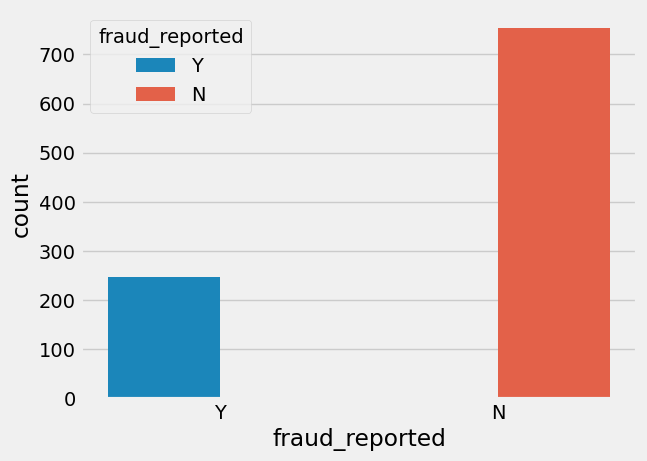

In [18]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(x = 'fraud_reported', data=df, hue='fraud_reported')

In [19]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [20]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

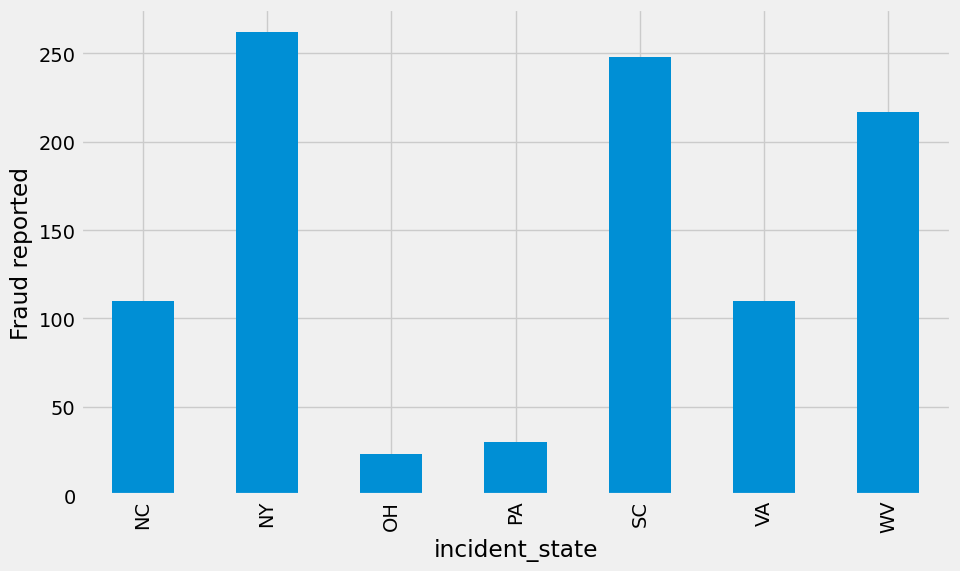

In [21]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

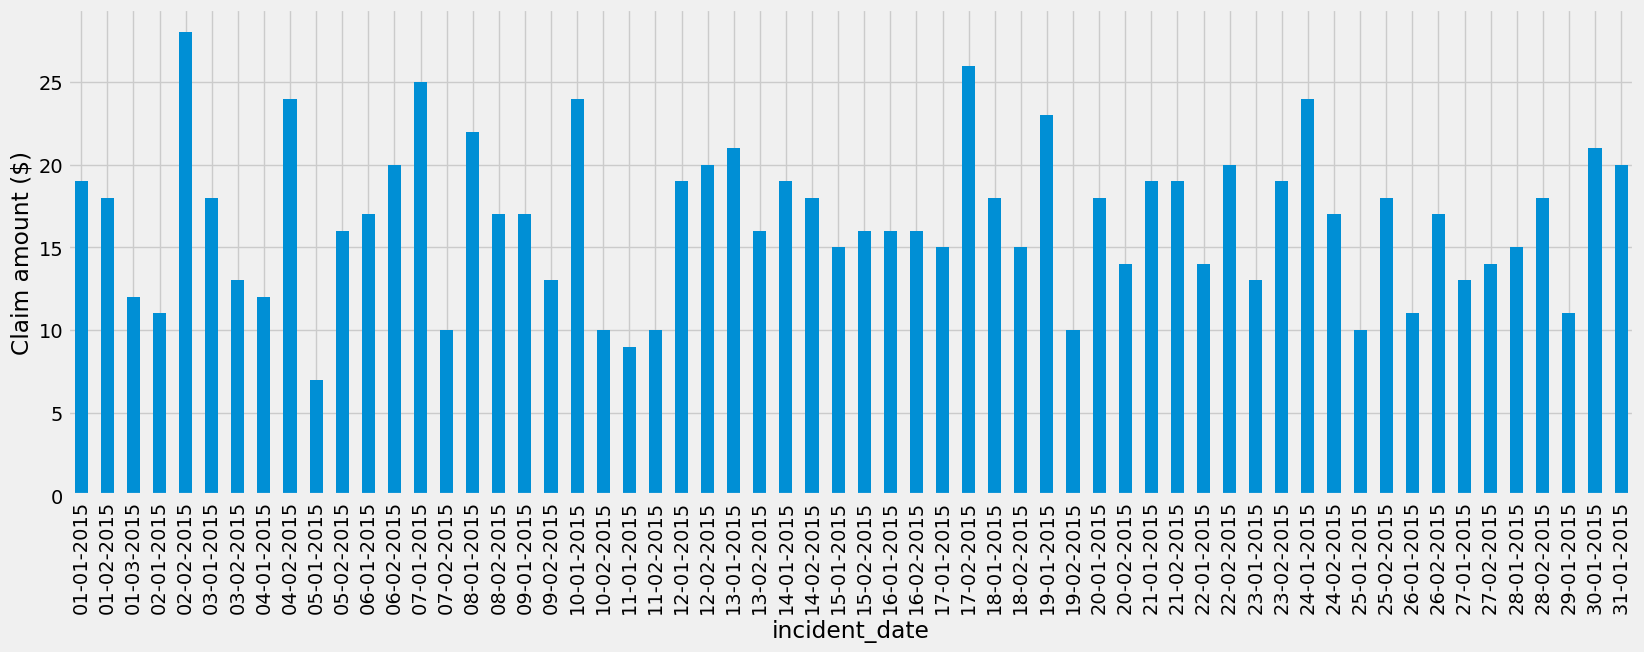

In [22]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

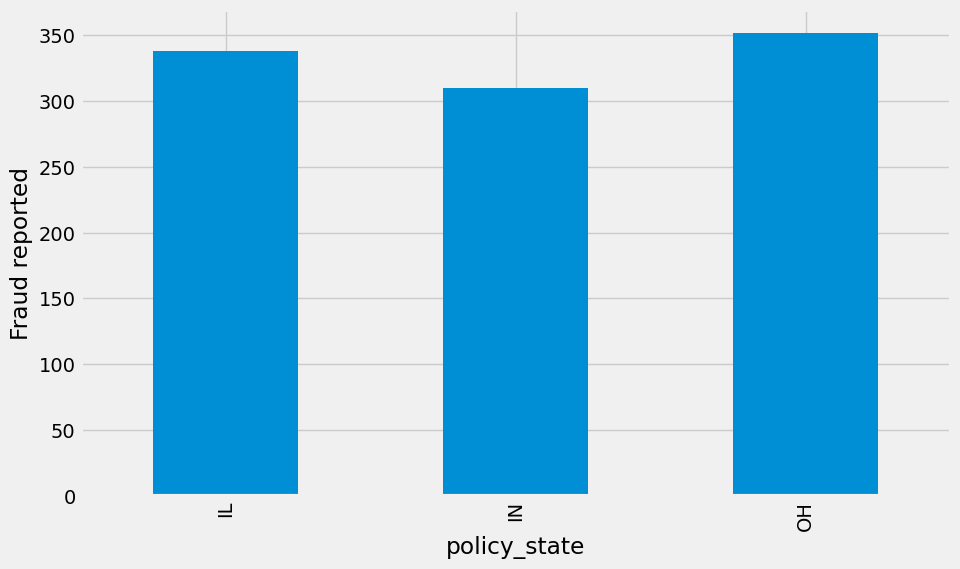

In [23]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

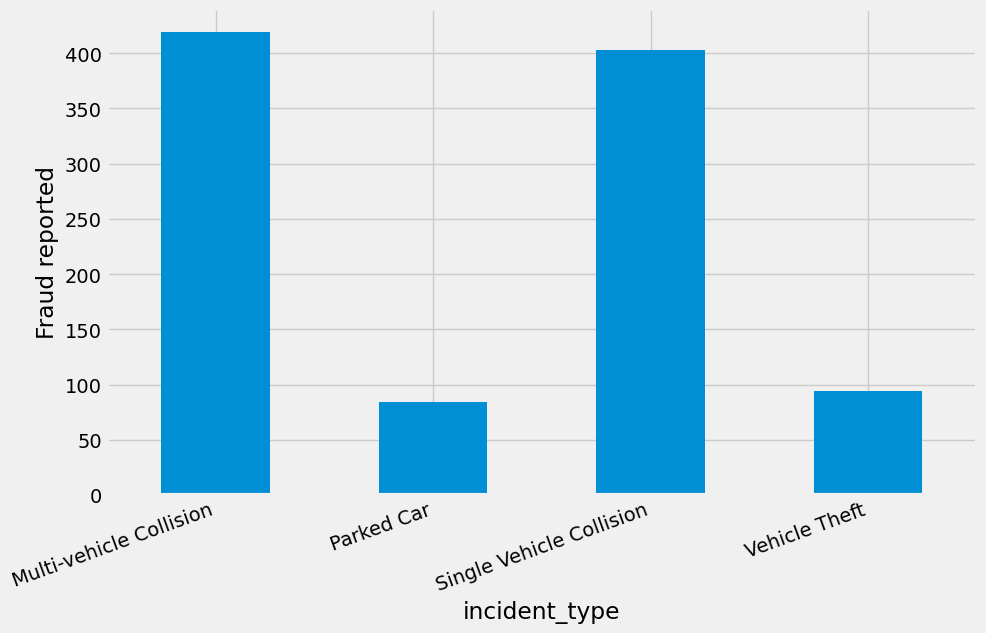

In [24]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

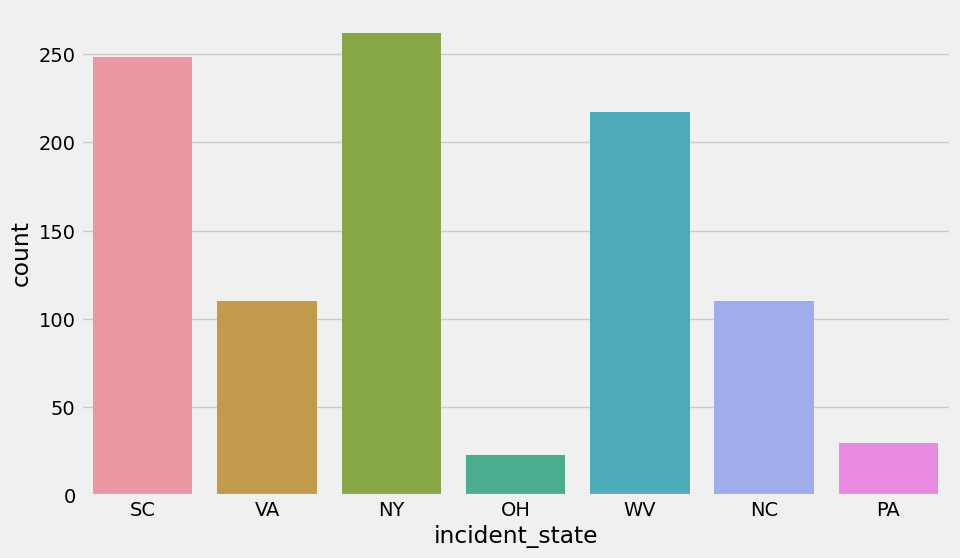

In [25]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='incident_state', data=df)

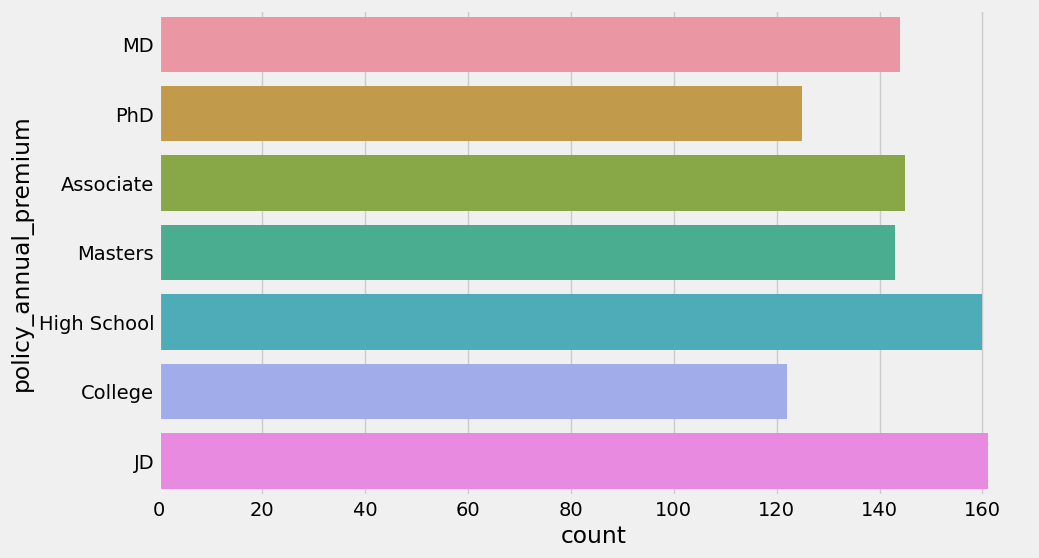

In [26]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'insured_education_level',data=df)
ax.set_ylabel('policy_annual_premium')
plt.show()

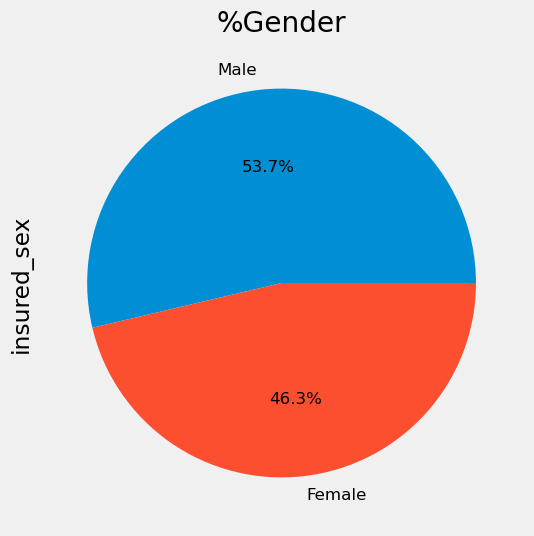

In [27]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0/len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)
ax.set_title('%Gender')
plt.show()

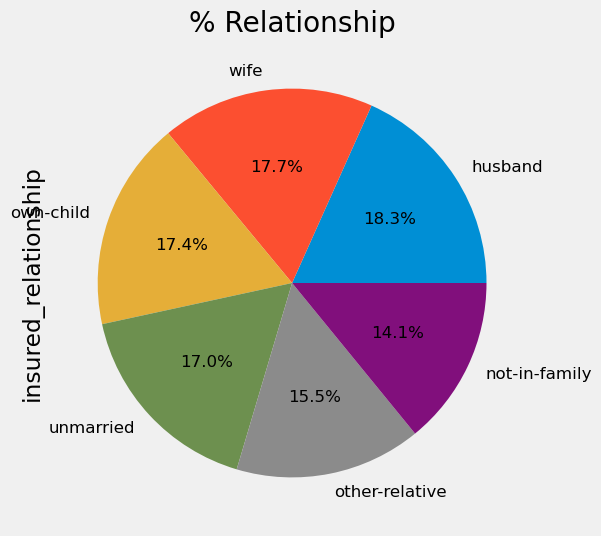

In [28]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0/len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],fontsize=12)
ax.set_title('% Relationship')
plt.show()

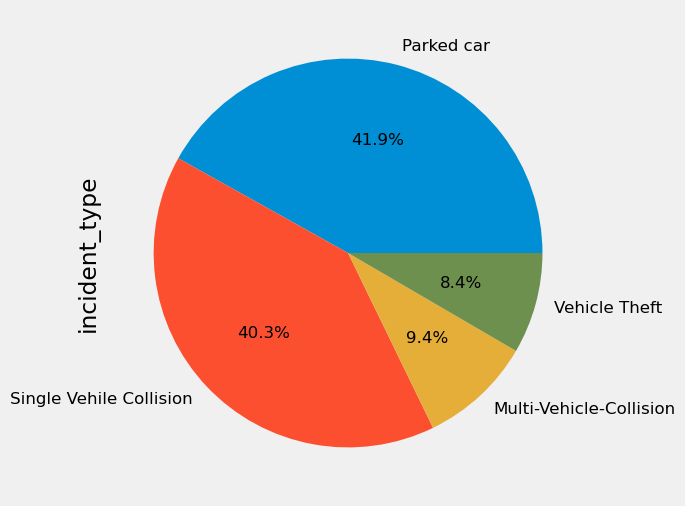

In [29]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0/len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked car', 'Single Vehile Collision', 'Multi-Vehicle-Collision', 'Vehicle Theft'], fontsize=12)

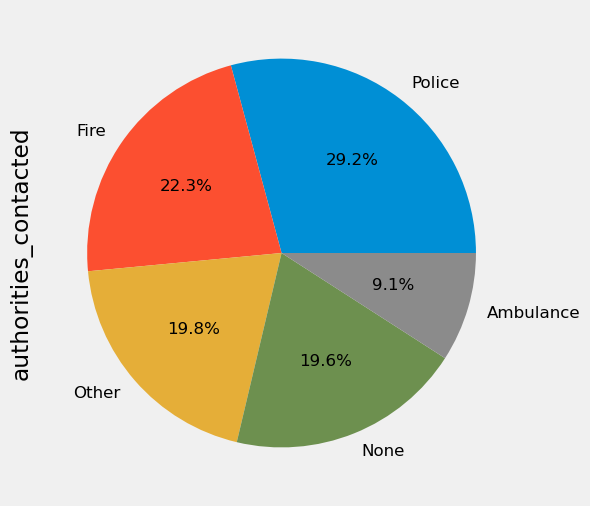

In [30]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0/len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'], fontsize=12)

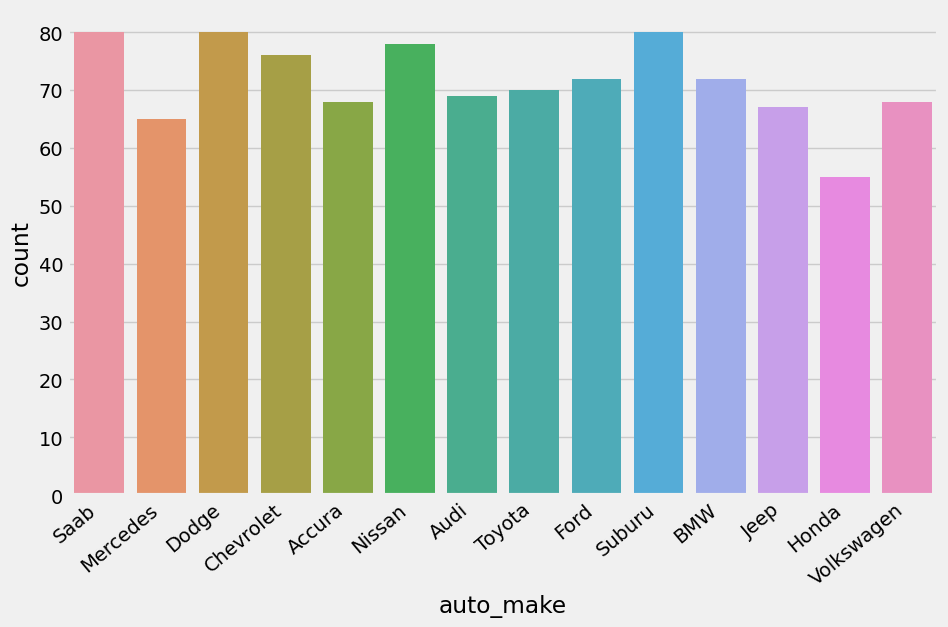

In [31]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

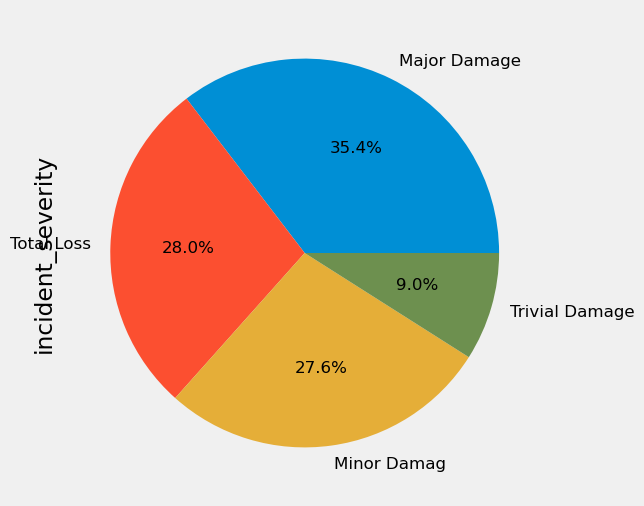

In [32]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0/len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damag', 'Trivial Damage'], fontsize=12)

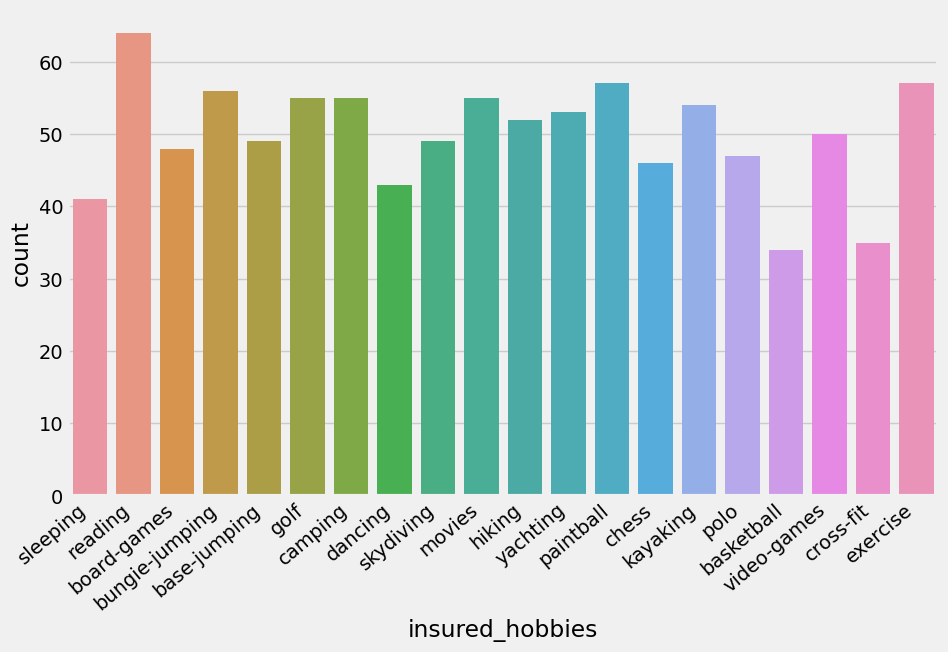

In [33]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [34]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

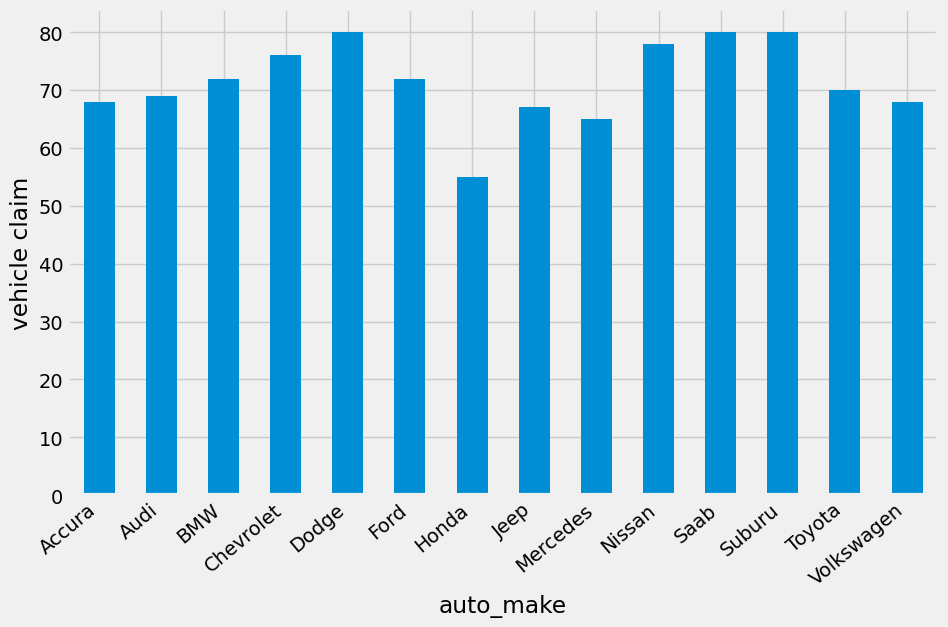

In [35]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

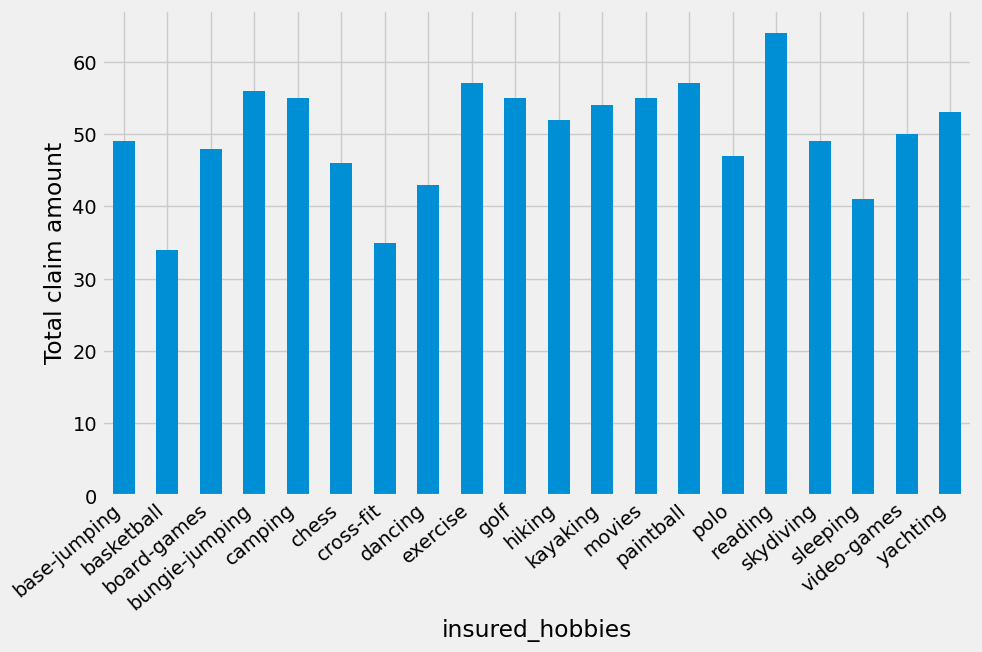

In [36]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [37]:
df['fraud_reported'].replace(to_replace='Y', value=1, inplace=True)
df['fraud_reported'].replace(to_replace='N', value=0, inplace=True)

df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [38]:
df[['insured_zip']] = df[['insured_zip']].astype(object)

In [39]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit  capital-gains   capital-loss  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06   25126.100000  -26793.700000   
std               244.167395    2.297407e+06   27872.187708   28104.096686   
min               433.330000   -1.000000e+06       0.000000 -111100.000000   
25%              1089.607500    0.000000e+00       0.000000  -51500.000000   
50%              1257.200000    0.000000e+00       0.000000  -23250.000000   
75%              1415.695000    0.000000e+00   51025.000000       0.000000   
max              2047.590000    1.000000e+07  100500.000000       0.000000   

       incident_hour_of_the_day  number_of_vehicles_involved  bodily_injuries  \
count               1000.000000                   1000.00000      1000.000000   
mean                  11.644000                      1.83900         0.992000   
std                    6.951373                      1.01888         0.820127   
min                    0.000000                      1.00000         0.000000   
25%                    6.000000                      1.00000         0.000000   
50%                   12.000000                      1.00000         1.000000   
75%                   17.000000                      3.00000         2.000000   
max                   23.000000                      4.00000         2.000000   

         witnesses  total_claim_amount  injury_claim  property_claim  \
count  1000.000000          1000.00000   1000.000000     1000.000000   
mean      1.487000         52761.94000   7433.420000     7399.570000   
std       1.111335         26401.53319   4880.951853     4824.726179   
min       0.000000           100.00000      0.000000        0.000000   
25%       1.000000         41812.50000   4295.000000     4445.000000   
50%       1.000000         58055.00000   6775.000000     6750.000000   
75%       2.000000         70592.50000  11305.000000    10885.000000   
max       3.000000        114920.00000  21450.000000    23670.000000   

       vehicle_claim    auto_year  fraud_reported  _c39  
count    1000.000000  1000.000000     1000.000000   0.0  
mean    37928.950000  2005.103000        0.247000   NaN  
std     18886.252893     6.015861        0.431483   NaN  
min        70.000000  1995.000000        0.000000   NaN  
25%     30292.500000  2000.000000        0.000000   NaN  
50%     42100.000000  2005.000000        0.000000   NaN  
75%     50822.500000  2010.000000        0.000000   NaN  
max     79560.000000  2015.000000        1.000000   NaN

In [40]:
df.auto_year.value_counts()

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

In [41]:
df['vehicle_age'] = 2018 - df['auto_year']
df['vehicle_age'].head(10)

0    14
1    11
2    11
3     4
4     9
5    15
6     6
7     3
8     6
9    22
Name: vehicle_age, dtype: int64

In [42]:
bins = [-1,3,6,9,12,17,20,24]
names = ["past_midnight","early_morning", "morning", 'fore-noon', 'afternoon','evening','night']
df['incident_period_of_day'] = pd.cut(df.incident_hour_of_the_day, bins, labels=names).astype(object)
df[['incident_hour_of_the_day', 'incident_period_of_day']].head(20)

incident_hour_of_the_day incident_period_of_day
0                          5          early_morning
1                          8                morning
2                          7                morning
3                          5          early_morning
4                         20                evening
5                         19                evening
6                          0          past_midnight
7                         23                  night
8                         21                  night
9                         14              afternoon
10                        22                  night
11                        21                  night
12                         9                morning
13                         5          early_morning
14                        12              fore-noon
15                        12              fore-noon
16                         0          past_midnight
17                         9                morning
18                        19                evening
19                         8                morning

In [43]:
df.select_dtypes(include=['object']).columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_zip',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'incident_date',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'incident_period_of_day'],
      dtype='object')

In [44]:
df = df.drop(columns = [
    'policy_number',
    'insured_zip',
    'policy_bind_date',
    'incident_location',
    '_c39',
    'auto_year',
    'incident_hour_of_the_day'])

df.head(2)

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                 328   48           OH    250/500               1000   
1                 228   42           IN    250/500               2000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   

   capital-loss incident_date             incident_type  collision_type  \
0             0    25-01-2015  Single Vehicle Collision  Side Collision   
1             0    21-01-2015             Vehicle Theft               ?   

  incident_severity authorities_contacted incident_state incident_city  \
0      Major Damage                Police             SC      Columbus   
1      Minor Damage                Police             VA     Riverwood   

   number_of_vehicles_involved property_damage  bodily_injuries  witnesses  \
0                            1             YES                1          2   
1                            1               ?                0          0   

  police_report_available  total_claim_amount  injury_claim  property_claim  \
0                     YES               71610          6510           13020   
1                       ?                5070           780             780   

   vehicle_claim auto_make auto_model  fraud_reported  vehicle_age  \
0          52080      Saab        92x               1           14   
1           3510  Mercedes       E400               1           11   

  incident_period_of_day  
0          early_morning  
1                morning

In [45]:
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtypes == object:
        j = np.sum(df[i] == "?")
        unknowns[i] = j
        
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                           0
policy_state               0
policy_csl                 0
insured_sex                0
insured_education_level    0
insured_occupation         0
insured_hobbies            0
insured_relationship       0
incident_date              0
incident_type              0
collision_type           178
incident_severity          0
authorities_contacted      0
incident_state             0
incident_city              0
property_damage          360
police_report_available  343
auto_make                  0
auto_model                 0
incident_period_of_day     0


In [46]:
df.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

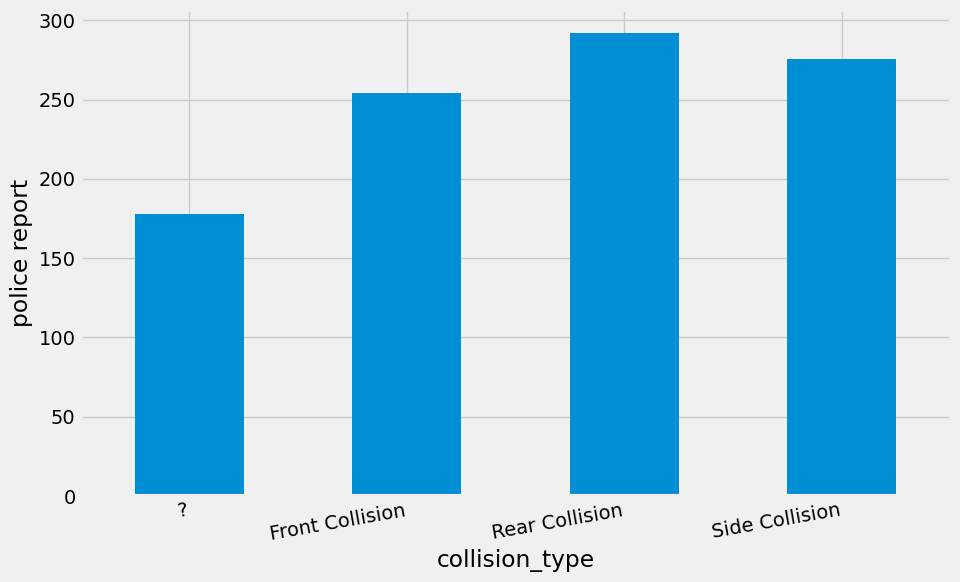

In [47]:
plt.style.use('fivethirtyeight')
fig =  plt.figure(figsize=(10,6))
ax = df.groupby('collision_type').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [48]:
df.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

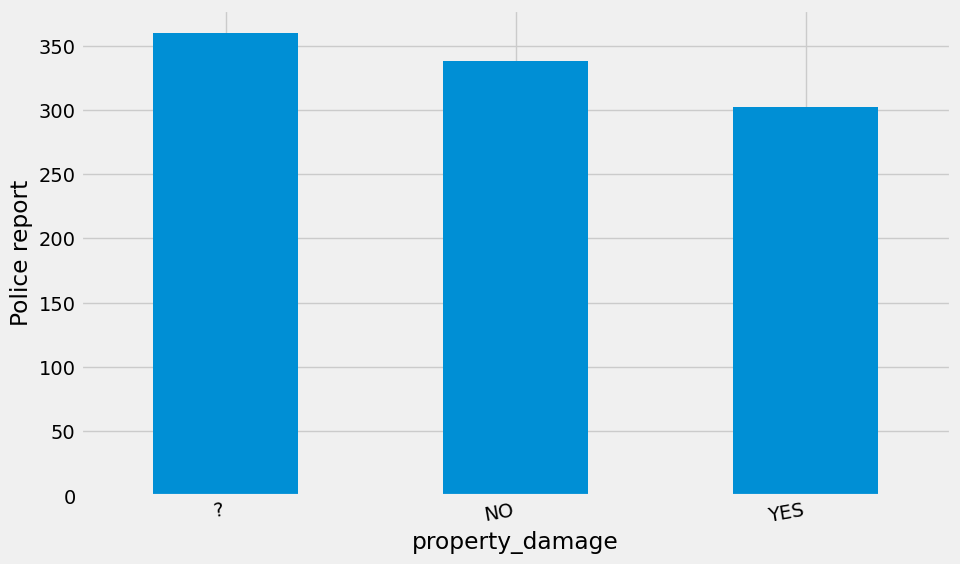

In [49]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('property_damage').police_report_available.count().plot.bar(ylim=0)
ax.set_ylabel('Police report')
ax.set_xticklabels(ax.get_xticklabels(), rotation=10, ha="right")
plt.show()

In [50]:
df.police_report_available.value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [51]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_make', 'auto_model', 'fraud_reported', 'vehicle_age',
       'incident_period_of_day'],
      dtype='object')

In [52]:
df._get_numeric_data().head()

months_as_customer  age  policy_deductable  policy_annual_premium  \
0                 328   48               1000                1406.91   
1                 228   42               2000                1197.22   
2                 134   29               2000                1413.14   
3                 256   41               2000                1415.74   
4                 228   44               1000                1583.91   

   umbrella_limit  capital-gains  capital-loss  number_of_vehicles_involved  \
0               0          53300             0                            1   
1         5000000              0             0                            1   
2         5000000          35100             0                            3   
3         6000000          48900        -62400                            1   
4         6000000          66000        -46000                            1   

   bodily_injuries  witnesses  total_claim_amount  injury_claim  \
0                1          2               71610          6510   
1                0          0                5070           780   
2                2          3               34650          7700   
3                1          2               63400          6340   
4                0          1                6500          1300   

   property_claim  vehicle_claim  fraud_reported  vehicle_age  
0           13020          52080               1           14  
1             780           3510               1           11  
2            3850          23100               0           11  
3            6340          50720               1            4  
4             650           4550               0            9

In [53]:
df._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object')

In [54]:
df.select_dtypes(include=['object']).columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'incident_period_of_day'],
      dtype='object')

In [55]:
dummies = pd.get_dummies(df[[
    'policy_state',
    'policy_csl',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'auto_make',
    'auto_model',
    'incident_period_of_day']])

dummies = dummies.join(df[[
    'collision_type',
    'property_damage',
    'police_report_available',
    "fraud_reported"]])

dummies.head()

policy_state_IL  policy_state_IN  policy_state_OH  policy_csl_100/300  \
0                0                0                1                   0   
1                0                1                0                   0   
2                0                0                1                   1   
3                1                0                0                   0   
4                1                0                0                   0   

   policy_csl_250/500  policy_csl_500/1000  insured_sex_FEMALE  \
0                   1                    0                   0   
1                   1                    0                   0   
2                   0                    0                   1   
3                   1                    0                   1   
4                   0                    1                   0   

   insured_sex_MALE  insured_education_level_Associate  \
0                 1                                  0   
1                 1                                  0   
2                 0                                  0   
3                 0                                  0   
4                 1                                  1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_adm-clerical  insured_occupation_armed-forces  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   insured_occupation_craft-repair  insured_occupation_exec-managerial  \
0                                1                                   0   
1                                0                                   0   
2                                0                                   0   
3                                0                                   0   
4                                0                                   0   

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0                                   0                                     0   
1                                   0                                     0   
2                                   0                                     0   
3                                   0                                     0   
4                                   0                                     0   

   insured_occupation_machine-op-inspct  insured_occupation_other-service  \
0                                     0                                 0   
1                                     1                                 0   
2

In [56]:
x = dummies.iloc[:, 0:-1]
y = dummies.iloc[:, -1]

In [57]:
len(x.columns)

145

In [58]:
x.head(2)

policy_state_IL  policy_state_IN  policy_state_OH  policy_csl_100/300  \
0                0                0                1                   0   
1                0                1                0                   0   

   policy_csl_250/500  policy_csl_500/1000  insured_sex_FEMALE  \
0                   1                    0                   0   
1                   1                    0                   0   

   insured_sex_MALE  insured_education_level_Associate  \
0                 1                                  0   
1                 1                                  0   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   

   insured_occupation_adm-clerical  insured_occupation_armed-forces  \
0                                0                                0   
1                                0                                0   

   insured_occupation_craft-repair  insured_occupation_exec-managerial  \
0                                1                                   0   
1                                0                                   0   

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0                                   0                                     0   
1                                   0                                     0   

   insured_occupation_machine-op-inspct  insured_occupation_other-service  \
0                                     0                                 0   
1                                     1                                 0   

   insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
0                                   0                                  0   
1                                   0                                  0   

   insured_occupation_protective-serv  insured_occupation_sales  \
0                                   0                         0   
1                                   0                         0   

   insured_occupation_tech-support  insured_occupation_transport-moving  \
0                                0                                    0   
1                                0                                    0   

   insured_hobbies_base-jumping  insured_hobbies_basketball  \
0                             0                           0   
1                             0                           0   

   insured_hobbies_board-games  insured_hobbies_bungie-jumping  \
0                            0                               0   
1                            0                               0   

   insured_hobbies_camping  insured_hobbies_chess  insured_hobbies_cross-fit  \
0                        0                      0                          0   
1                        0                      0                          0   

   insured_hobbies_dancing  insured_hobbies_exercise  insured_hobbies_golf  \
0                        0                         0                     0   
1                        0                         0                     0   

   insured_hobbies_hiking  insured_hobbies_kayaking  insured_hobbies_movies  \
0                       0                         0                       0   
1                       0                         0                       0   

   insured_hobbies_paintball  insured_hobbies_polo  insured_hobbies_reading  \
0                          0              

In [59]:
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [60]:
x['collision_en'] = LabelEncoder().fit_transform(dummies['collision_type'])
x[['collision_type', 'collision_en']]

collision_type  collision_en
0     Side Collision             3
1                  ?             0
2     Rear Collision             2
3    Front Collision             1
4                  ?             0
..               ...           ...
995  Front Collision             1
996   Rear Collision             2
997   Side Collision             3
998   Rear Collision             2
999                ?             0

[1000 rows x 2 columns]

In [61]:
x = x.drop(columns = ['collision_type'])
x.head(2)

policy_state_IL  policy_state_IN  policy_state_OH  policy_csl_100/300  \
0                0                0                1                   0   
1                0                1                0                   0   

   policy_csl_250/500  policy_csl_500/1000  insured_sex_FEMALE  \
0                   1                    0                   0   
1                   1                    0                   0   

   insured_sex_MALE  insured_education_level_Associate  \
0                 1                                  0   
1                 1                                  0   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   

   insured_occupation_adm-clerical  insured_occupation_armed-forces  \
0                                0                                0   
1                                0                                0   

   insured_occupation_craft-repair  insured_occupation_exec-managerial  \
0                                1                                   0   
1                                0                                   0   

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0                                   0                                     0   
1                                   0                                     0   

   insured_occupation_machine-op-inspct  insured_occupation_other-service  \
0                                     0                                 0   
1                                     1                                 0   

   insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
0                                   0                                  0   
1                                   0                                  0   

   insured_occupation_protective-serv  insured_occupation_sales  \
0                                   0                         0   
1                                   0                         0   

   insured_occupation_tech-support  insured_occupation_transport-moving  \
0                                0                                    0   
1                                0                                    0   

   insured_hobbies_base-jumping  insured_hobbies_basketball  \
0                             0                           0   
1                             0                           0   

   insured_hobbies_board-games  insured_hobbies_bungie-jumping  \
0                            0                               0   
1                            0                               0   

   insured_hobbies_camping  insured_hobbies_chess  insured_hobbies_cross-fit  \
0                        0                      0                          0   
1                        0                      0                          0   

   insured_hobbies_dancing  insured_hobbies_exercise  insured_hobbies_golf  \
0                        0                         0                     0   
1                        0                         0                     0   

   insured_hobbies_hiking  insured_hobbies_kayaking  insured_hobbies_movies  \
0                       0                         0                       0   
1                       0                         0                       0   

   insured_hobbies_paintball  insured_hobbies_polo  insured_hobbies_reading  \
0                          0              

In [62]:
x= pd.concat([x, df._get_numeric_data()], axis=1)
x.head(2)

policy_state_IL  policy_state_IN  policy_state_OH  policy_csl_100/300  \
0                0                0                1                   0   
1                0                1                0                   0   

   policy_csl_250/500  policy_csl_500/1000  insured_sex_FEMALE  \
0                   1                    0                   0   
1                   1                    0                   0   

   insured_sex_MALE  insured_education_level_Associate  \
0                 1                                  0   
1                 1                                  0   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   

   insured_occupation_adm-clerical  insured_occupation_armed-forces  \
0                                0                                0   
1                                0                                0   

   insured_occupation_craft-repair  insured_occupation_exec-managerial  \
0                                1                                   0   
1                                0                                   0   

   insured_occupation_farming-fishing  insured_occupation_handlers-cleaners  \
0                                   0                                     0   
1                                   0                                     0   

   insured_occupation_machine-op-inspct  insured_occupation_other-service  \
0                                     0                                 0   
1                                     1                                 0   

   insured_occupation_priv-house-serv  insured_occupation_prof-specialty  \
0                                   0                                  0   
1                                   0                                  0   

   insured_occupation_protective-serv  insured_occupation_sales  \
0                                   0                         0   
1                                   0                         0   

   insured_occupation_tech-support  insured_occupation_transport-moving  \
0                                0                                    0   
1                                0                                    0   

   insured_hobbies_base-jumping  insured_hobbies_basketball  \
0                             0                           0   
1                             0                           0   

   insured_hobbies_board-games  insured_hobbies_bungie-jumping  \
0                            0                               0   
1                            0                               0   

   insured_hobbies_camping  insured_hobbies_chess  insured_hobbies_cross-fit  \
0                        0                      0                          0   
1                        0                      0                          0   

   insured_hobbies_dancing  insured_hobbies_exercise  insured_hobbies_golf  \
0                        0                         0                     0   
1                        0                         0                     0   

   insured_hobbies_hiking  insured_hobbies_kayaking  insured_hobbies_movies  \
0                       0                         0                       0   
1                       0                         0                       0   

   insured_hobbies_paintball  insured_hobbies_polo  insured_hobbies_reading  \
0                          0              

In [63]:
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-loss', 'number_of_vehicles_involved', 'bodily_injuries',
       'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'fraud_reported', 'vehicle_age'],
      dtype='object', length=161)

In [64]:
x = x.drop(columns = ['fraud_reported'])
x.columns

Index(['policy_state_IL', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_100/300', 'policy_csl_250/500', 'policy_csl_500/1000',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'insured_education_level_Associate', 'insured_education_level_College',
       ...
       'capital-gains', 'capital-loss', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'vehicle_age'],
      dtype='object', length=160)

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold


In [68]:
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=7)
result = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
print(result.mean())

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=1234)
print('length of x_train and x_test: ', len(x_train), len(x_test))
print('length of y_train, and y_test: ', len(y_train), len(y_test))

length of x_train and x_test:  800 200
length of y_train, and y_test:  800 200


In [70]:
from sklearn.metrics import recall_score, cohen_kappa_score
from sklearn import metrics

In [71]:
rfc = RandomForestClassifier(criterion = 'gini', n_estimators=1000, verbose=1, n_jobs=-1,
                            class_weight = 'balanced', max_features = 'auto')
rfcg = rfc.fit(x_train,y_train)
predictions = rfcg.predict(x_test)

print('Baseline: N_features: ', len(list(x.columns)))
print('Baseline: Accuracy: ', round(accuracy_score(y_test, predictions)*100,2))
print('Cohen kappa: '+ str(np.round(cohen_kappa_score(y_test, predictions),3)))
print('Baseline: Recall: ', round(recall_score(y_test, predictions)*100,2))
print('\n Classification Report:\n', classification_report(y_test,predictions))



ValueError: could not convert string to float: 'NO'

In [72]:
import itertools

In [77]:
def plot_confusion_matrix(cm, classes, title = 'confusion matrix', normalize=False, cmap = plt.cm.Blues):
    print('confusion matrix')
    
    print(cm)
    
    fig=plt.figure(figsize=(10,6))
    plt.style.use('fivethirtyeight')
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arrange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color = "white" if cm[i, j] > thresh else "black")
        
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fraud reported_Y','Fraud_reported_N'],
                     title='Random Forest-Confusion matrix')
    

NameError: name 'predictions' is not defined

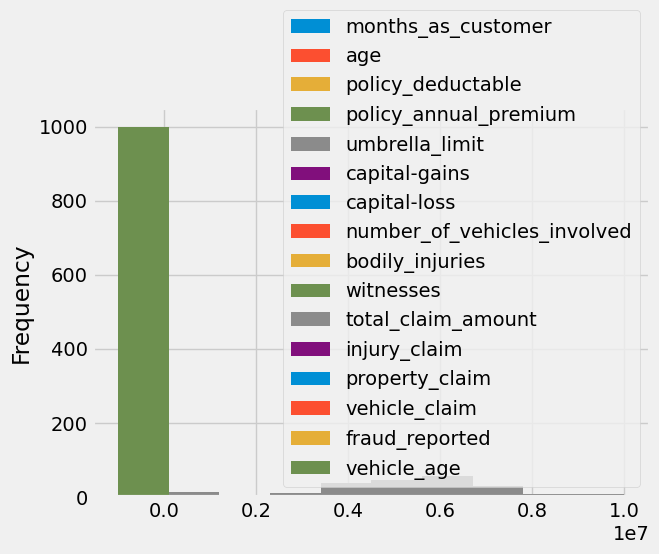

In [78]:
df.plot(kind='hist')
plt.show()

In [79]:
print('Minimun premimum' + str(df['policy_annual_premium'].min()))
print('Maximun premium'+ str(df['policy_annual_premium'].max()))

Minimun premimum433.33
Maximun premium2047.59


In [80]:
scaler = StandardScaler(with_mean=False)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

ValueError: could not convert string to float: 'NO'

In [85]:

from sklearn import model_selection
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier




In [87]:
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
model.append(('ADA', AdaBoostClassifier(n_estimators=100)))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,random_state=seed)
    CV_results = model_selection.cross_val_score(model, x_train_scaled, y_train,cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)
    
    
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

AttributeError: 'LinearDiscriminantAnalysis' object has no attribute 'append'

# Zomato Resturant

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn import svm 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Ridge, Lasso 
from sklearn.metrics import roc_auc_score, mean_squared_error, classification_report, roc_curve
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score


In [3]:
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding=('ISO-8859-1'), low_memory=False)

In [4]:
df1.head(5)

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [5]:
df2=pd.read_excel("Country-Code.xlsx")


In [6]:
zomato=pd.merge(df1,df2)

In [7]:
zomato.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...  Has Table booking  \
0        French, Japanese, Desserts  ...                Yes   
1                          Japanese  ...                Yes   
2  Seafood, Asian, Filipino, Indian  ...                Yes   
3                   Japanese, Sushi  ...                 No   
4                  Japanese, Korean  ...                Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

  Aggregate rating  Rating color  Rating text Votes      Country  
0              4.8    Dark Green    Excellent   314  Phillipines  
1              4.5    Dark Green    Excellent   591  Phillipines  
2              4.4         Green    Very Good   270  Phillipines  
3              4.9    Dark Green    Excellent   365  Phillipines  
4              4.8    Dark Green    Excellent   229  Phillipines  

[5 rows x 22 columns]

In [8]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [9]:
zomato.describe

<bound method NDFrame.describe of       Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanb

In [10]:
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [11]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [12]:
object_cols= list(zomato.select_dtypes(include=['object']).columns)
object_cols

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [13]:
zomato.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
Country                   15
dtype: int64

In [14]:
col_details = pd.DataFrame([(col, dtype, unique_count) for col, dtype, unique_count in zip(zomato.columns, zomato.dtypes, zomato.nunique())],
                          columns=['Column', 'Data Type', 'Unique Values'])
col_details

Column Data Type  Unique Values
0          Restaurant ID     int64           9551
1        Restaurant Name    object           7446
2           Country Code     int64             15
3                   City    object            141
4                Address    object           8918
5               Locality    object           1208
6       Locality Verbose    object           1265
7              Longitude   float64           8120
8               Latitude   float64           8677
9               Cuisines    object           1825
10  Average Cost for two     int64            140
11              Currency    object             12
12     Has Table booking    object              2
13   Has Online delivery    object              2
14     Is delivering now    object              2
15  Switch to order menu    object              1
16           Price range     int64              4
17      Aggregate rating   float64             33
18          Rating color    object              6
19           Rating text    object              6
20                 Votes     int64           1012
21               Country    object             15

In [15]:
col_details['Col Type'] = ['Discrete Num Data', 'Qualitative Data', 'Nominal Categorigal data', 'Nominal Categorical data',
                          'Qualitative Data', 'Qualitative Data', 'Qualitative Data', 'Continuous Num data',
                          'Continuous Num data', 'Qualitative Data', 'Continuous Num data', 'Nominal Categorical data',
                          'Nominal Categorical data', 'Nominal Categorical data', 'Nominal Categorical data',
                          'Nominal Categorical data', 'Ordinal categorical data', 'Continuous Num data',
                          'Ordinal Categorical data', 'Ordinal categorical data', 'Continuous Num data']

ValueError: Length of values (21) does not match length of index (22)

In [16]:
col_details

Column Data Type  Unique Values
0          Restaurant ID     int64           9551
1        Restaurant Name    object           7446
2           Country Code     int64             15
3                   City    object            141
4                Address    object           8918
5               Locality    object           1208
6       Locality Verbose    object           1265
7              Longitude   float64           8120
8               Latitude   float64           8677
9               Cuisines    object           1825
10  Average Cost for two     int64            140
11              Currency    object             12
12     Has Table booking    object              2
13   Has Online delivery    object              2
14     Is delivering now    object              2
15  Switch to order menu    object              1
16           Price range     int64              4
17      Aggregate rating   float64             33
18          Rating color    object              6
19           Rating text    object              6
20                 Votes     int64           1012
21               Country    object             15

In [17]:
Description_of_col = ['Cnt_Use, As all vals are unq',
                     'Cnt_Use.Imbal Dist. More unq vals',
                     'Cnt_Use.Imbal Dist.',
                     'Cnt_Use.Imbal Dist.',
                     'Cnt_Use.Qualitative data',
                     'Cnt_Use.Qualitative data',
                     'Cnt_Use.Qualitative data',
                     'Can_Use.Uneven Dist,has Out',
                     'Can_Use.Uneven Dist,has Out',
                     'Can_Use.Ned to groupby cusines',
                     'Can_Use.has out',
                     'Cnt_Use.Imbal Dist',
                     'Can_Use.',
                     'Can_Use.',
                     'Cnt_Use.Imbal dist',
                     'Cnt_Use.Only one cat',
                     'Can_Use.',
                     'Can_Use.Target Variable',
                     'Can_Use.',
                     'Can_Use.',
                     'Can_Use.']

In [18]:
col_details['Description'] = Description_of_col

ValueError: Length of values (21) does not match length of index (22)

In [19]:
col_details

Column Data Type  Unique Values
0          Restaurant ID     int64           9551
1        Restaurant Name    object           7446
2           Country Code     int64             15
3                   City    object            141
4                Address    object           8918
5               Locality    object           1208
6       Locality Verbose    object           1265
7              Longitude   float64           8120
8               Latitude   float64           8677
9               Cuisines    object           1825
10  Average Cost for two     int64            140
11              Currency    object             12
12     Has Table booking    object              2
13   Has Online delivery    object              2
14     Is delivering now    object              2
15  Switch to order menu    object              1
16           Price range     int64              4
17      Aggregate rating   float64             33
18          Rating color    object              6
19           Rating text    object              6
20                 Votes     int64           1012
21               Country    object             15

In [20]:
zomato.shape

(9551, 22)

array([[<AxesSubplot:title={'center':'Country Code'}>,
        <AxesSubplot:title={'center':'Longitude'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Average Cost for two'}>],
       [<AxesSubplot:title={'center':'Aggregate rating'}>,
        <AxesSubplot:title={'center':'Votes'}>]], dtype=object)

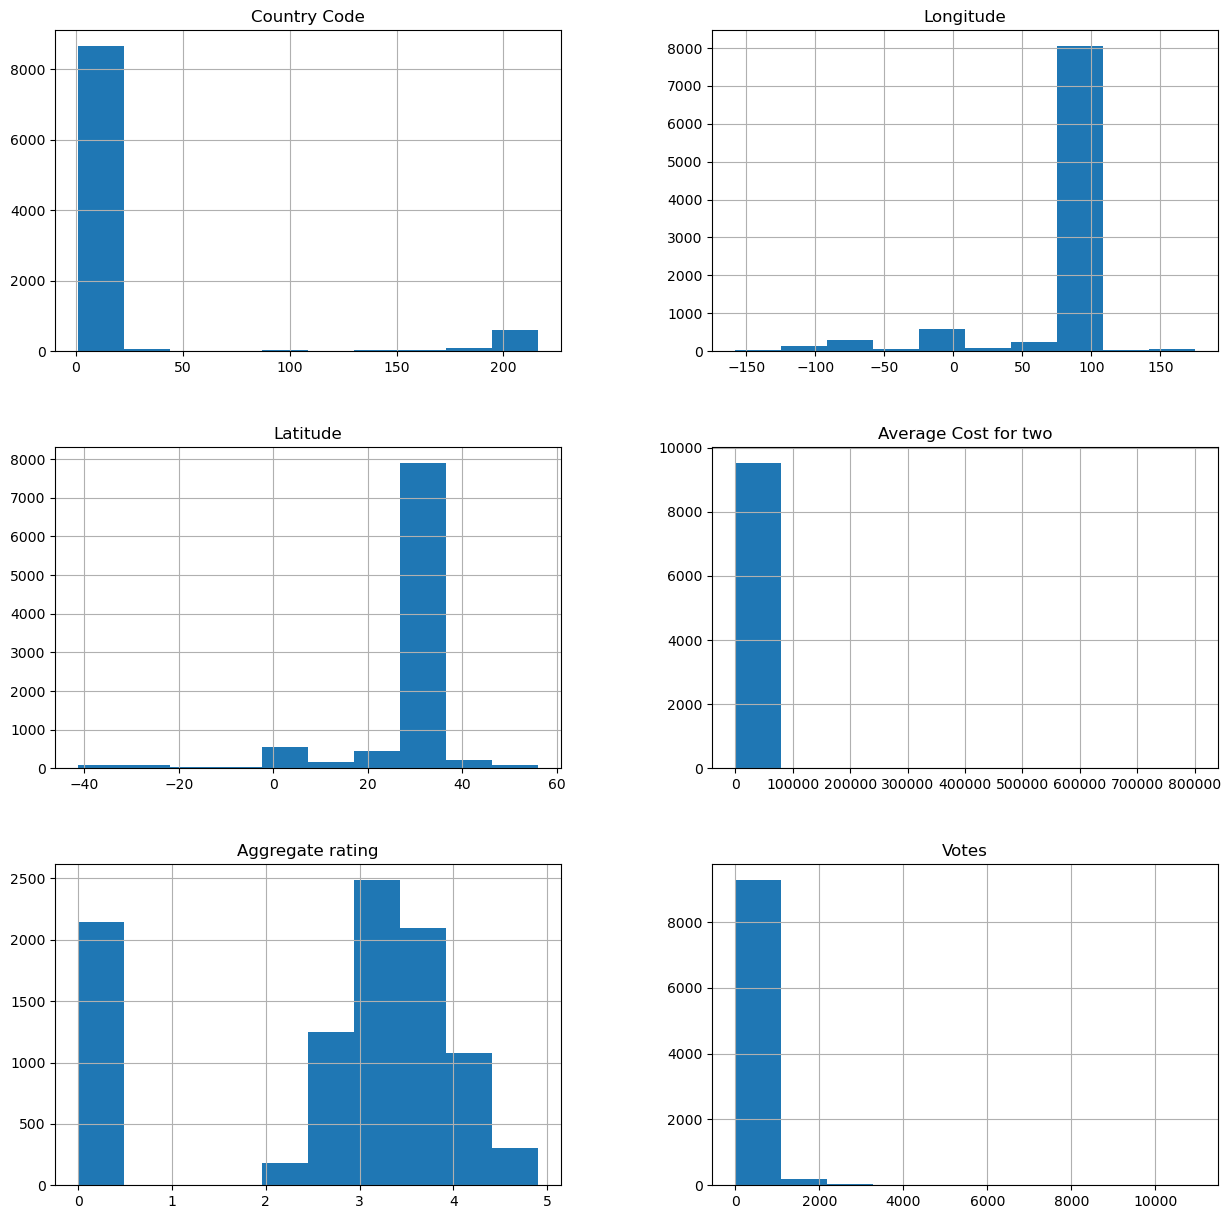

In [21]:
zomato[['Country Code', 'Longitude','Latitude', 'Average Cost for two', 'Aggregate rating', 'Votes']].hist(figsize=(15,15))

In [22]:
anova_cprr = cal_anova(dataset=zomato, inp_features=['Has Table booking','Has Online delivery',
                                                    'price range', 'Rating color', 
                                                    'rating text'], target_feature = 'Aggregate rate')


print(anova_cprr[0])
print("Selected Categorical features: ", anova_cprr[1])

NameError: name 'cal_anova' is not defined

<AxesSubplot:xlabel='Average Cost for two', ylabel='Aggregate rating'>

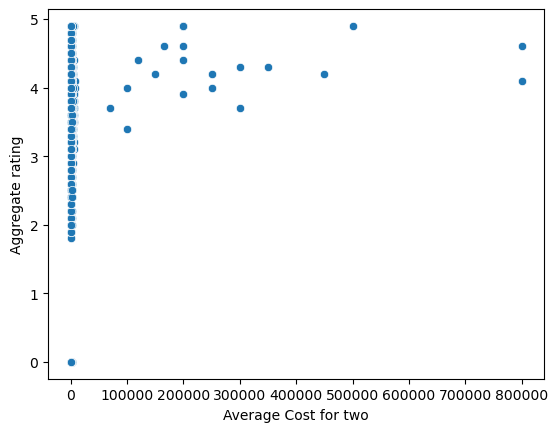

In [23]:
sns.scatterplot(data=zomato, x='Average Cost for two', y='Aggregate rating')


<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

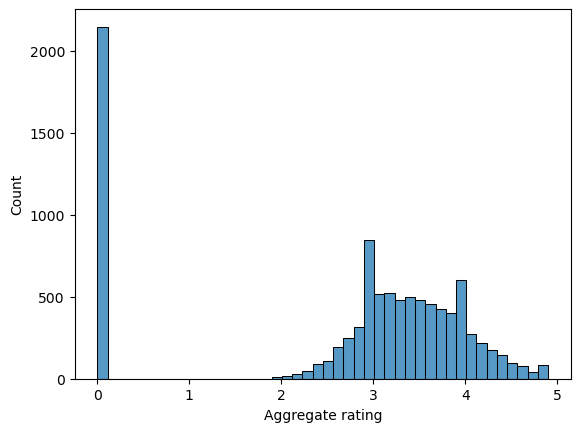

In [24]:
sns.histplot(data=zomato, x='Aggregate rating')

<AxesSubplot:xlabel='Average Cost for two', ylabel='Count'>

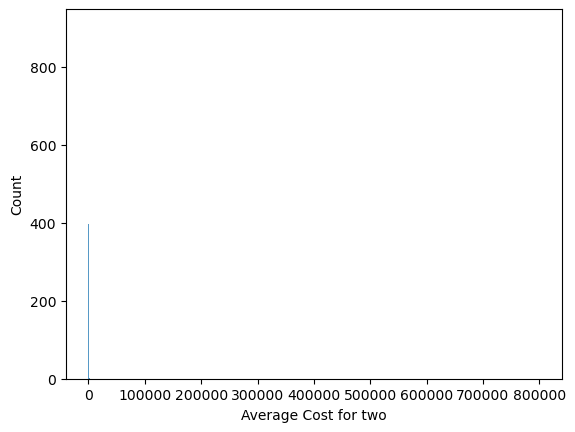

In [25]:
sns.histplot(data=zomato, x='Average Cost for two')

<AxesSubplot:xlabel='Votes', ylabel='Count'>

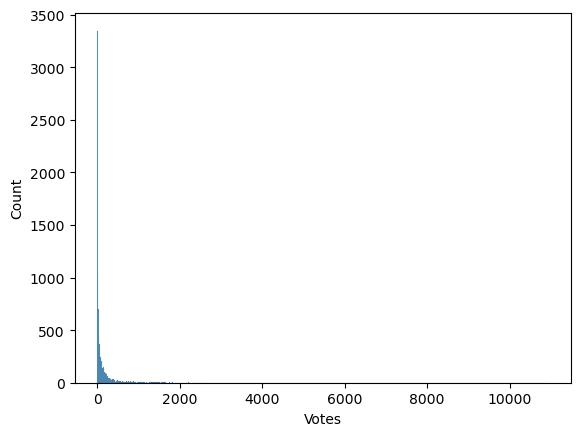

In [26]:
sns.histplot(data=zomato, x='Votes')

<AxesSubplot:xlabel='Votes', ylabel='Aggregate rating'>

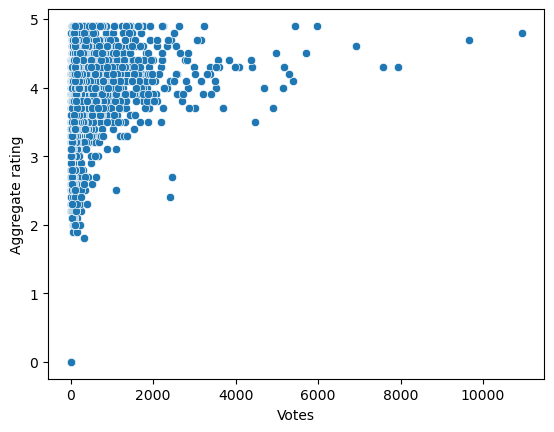

In [27]:
sns.scatterplot(data=zomato, x='Votes', y='Aggregate rating')

<AxesSubplot:xlabel='Has Table booking', ylabel='Aggregate rating'>

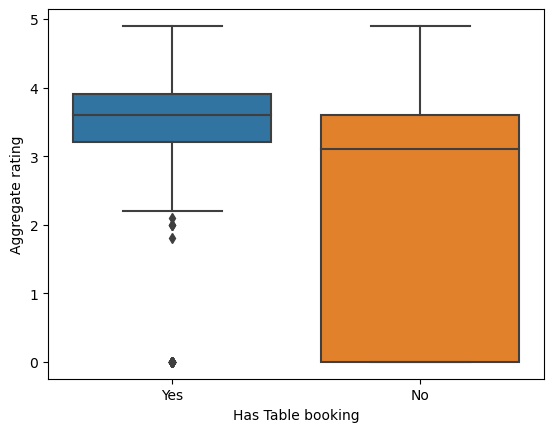

In [28]:
sns.boxplot(data=zomato, x='Has Table booking', y='Aggregate rating')

<AxesSubplot:xlabel='Has Online delivery', ylabel='Aggregate rating'>

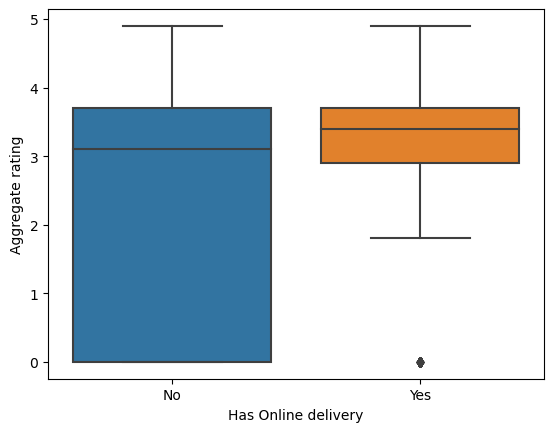

In [29]:
sns.boxplot(data=zomato, x='Has Online delivery', y='Aggregate rating')

<AxesSubplot:xlabel='Price range', ylabel='Aggregate rating'>

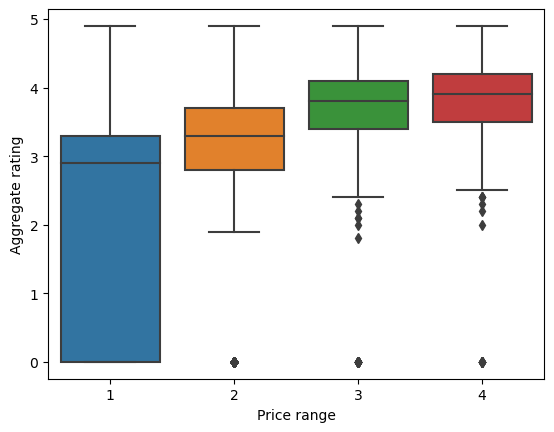

In [30]:
sns.boxplot(data=zomato, x='Price range', y='Aggregate rating')

<AxesSubplot:xlabel='Rating color', ylabel='Aggregate rating'>

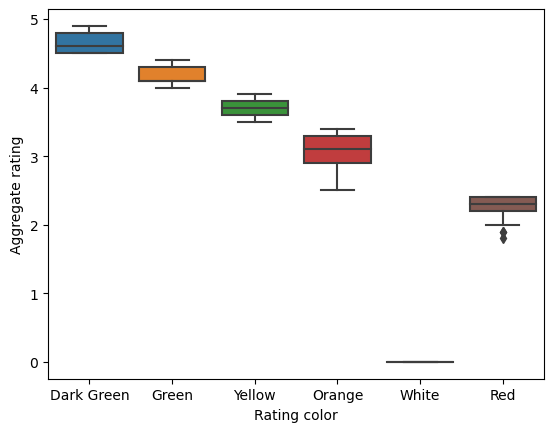

In [31]:
sns.boxplot(data=zomato, x='Rating color', y='Aggregate rating')

<AxesSubplot:xlabel='Rating text', ylabel='Aggregate rating'>

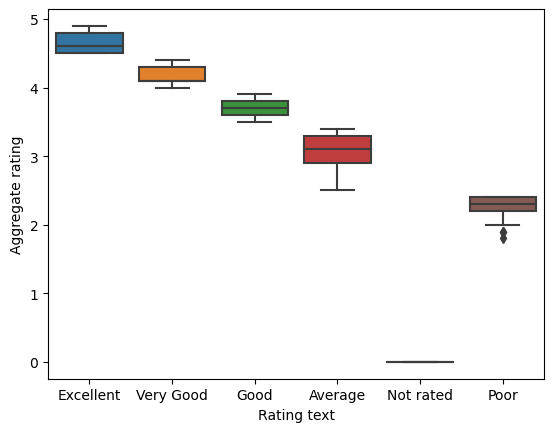

In [32]:
sns.boxplot(data=zomato, x='Rating text', y='Aggregate rating')

In [33]:
zomatoDF=zomato.copy()

In [34]:
zomatoDF

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  ...  Has Table booking  \
0     14.565443        French, Japanese, Desserts  ...                Yes   
1     14.553708                          Japanese  ...                Yes   
2     14.581404  Seafood, Asian, Filipino, Indian  ...                Yes   
3     14.585318                   Japanese, Sushi  ...                 No   
4     14.584450                  Japanese, Korean  ...                Yes   
...         ...                               ...  ...                ...   
9546  41.022793                           Turkish  ...                 No   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...                 No   
9548  41.055817            Italian, World Cuisine  ...                 No   
9549  41.057979                   Restaurant Cafe  ...                 No   

In [35]:
zomatoDF.shape

(9551, 22)

In [36]:
zomatoDF.drop_duplicates(inplace=True)

In [37]:
zomatoDF[(zomatoDF['Aggregate rating'] > 5.0) & (zomatoDF['Aggregate rating'] < 0.0)]

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes, Country]
Index: []

[0 rows x 22 columns]

In [38]:
def Extreme_IQR_for_skewed(dataset, feature):
    
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    
    IQR = Q3 - Q1
    
    upper_limit = Q3 + (3 * IQR)
    lower_limit = Q1 - (3 * IQR)
    
    lc = dataset[feature] < lower_limit
    lower_bound_outlier_index = dataset[lc].index
    uc = dataset[feature] > upper_limit
    upper_bound_outlier_index = dataset[uc].index
    outlier_index = dataset[lc | uc].index
    
    return (upper_limit, lower_limit, lower_bound_outier_index, upper_bound_outlier_index, outlier_index)

<AxesSubplot:xlabel='Average Cost for two', ylabel='Count'>

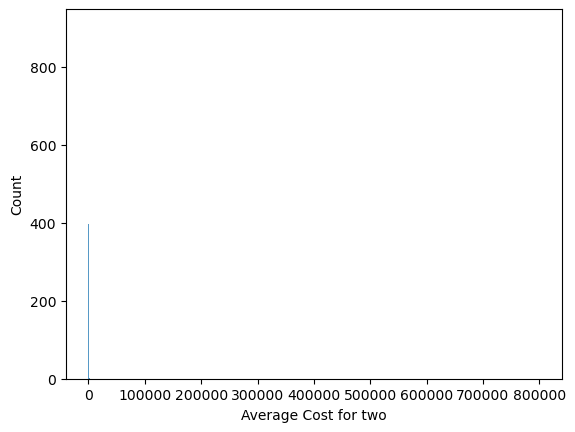

In [39]:
sns.histplot(data=zomato, x='Average Cost for two')

<AxesSubplot:xlabel='Votes', ylabel='Count'>

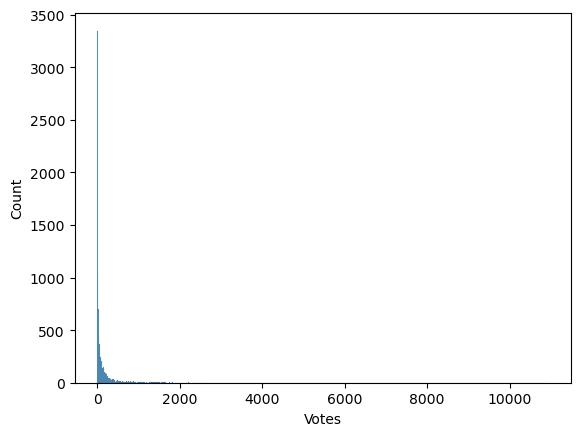

In [40]:
sns.histplot(data=zomatoDF, x='Votes')

In [41]:
zomatoDF.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [42]:
zomatoDF['Cuisines'].value_counts()

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [43]:
zomatoDF['Cuisines'].fillna('North Indian', inplace=True)

In [44]:
zomatoDF.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [45]:
zomatoDF

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  ...  Has Table booking  \
0     14.565443        French, Japanese, Desserts  ...                Yes   
1     14.553708                          Japanese  ...                Yes   
2     14.581404  Seafood, Asian, Filipino, Indian  ...                Yes   
3     14.585318                   Japanese, Sushi  ...                 No   
4     14.584450                  Japanese, Korean  ...                Yes   
...         ...                               ...  ...                ...   
9546  41.022793                           Turkish  ...                 No   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...                 No   
9548  41.055817            Italian, World Cuisine  ...                 No   
9549  41.057979                   Restaurant Cafe  ...                 No   

In [46]:
unique_cuisines = zomatoDF['Cuisines'].str.split(',').explode()
unique_cuisines.value_counts().head(14)

North Indian     3001
 Chinese         1880
 Fast Food       1314
 North Indian     968
Chinese           855
 Mughlai          780
Fast Food         672
Bakery            621
Cafe              617
 Italian          530
 Desserts         503
 Continental      501
 South Indian     374
 Street Food      326
Name: Cuisines, dtype: int64

<AxesSubplot:xlabel='Cuisines_Upd'>

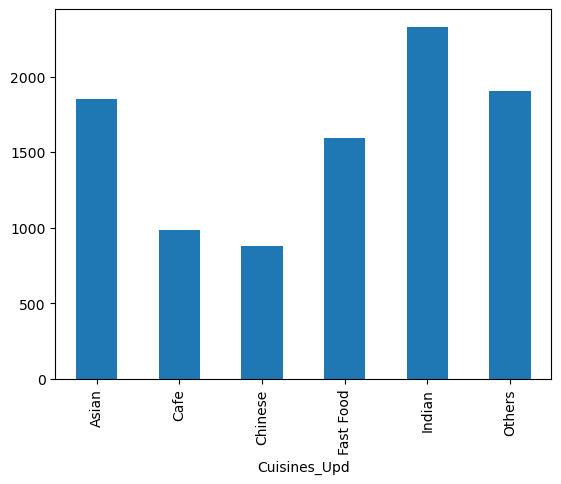

In [47]:
cuisine_mapping = {
    'North Indian': 'Indian',
    'Chinese': 'Chinese',
    'Fast Food': 'Fast Food',
    'Mughlai': 'Indian',
    'Bakery': 'Cafe',
    'Cafe': 'Cafe',
    'Street Food': 'Fast Food'
    
}

def replace_cuisines(cuisine):
    if "Indian" in cuisine and "Chinese" in cuisine:
        return "Asian"
    
    for key in cuisine_mapping:
        if key in cuisine:
            return cuisine_mapping[key]
        
    return "Others"

zomatoDF['Cuisines_Upd'] = zomatoDF['Cuisines'].map(replace_cuisines)

zomatoDF.groupby(by='Cuisines_Upd').size().plot(kind='bar')

In [48]:
zomatoDF.drop(columns='Cuisines', axis=1, inplace=True)

In [49]:
zomatoDF

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude  Average Cost for two  ... Has Online delivery  \
0     14.565443                  1100  ...                  No   
1     14.553708                  1200  ...                  No   
2     14.581404                  4000  ...                  No   
3     14.585318                  1500  ...                  No   
4     14.584450                  1500  ...                  No   
...         ...                   ...  ...                 ...   
9546  41.022793                    80  ...                  No   
9547  41.009847                   105  ...                  No   
9548  41.055817                   170  ...                  No   
9549  41.057979                   120  ...                  No   
9550  40.984776                    55  ...                  No   

     Is delivering now Switch to order menu Price ran

In [51]:
zomatoDF.rename(columns={'Cuisines_Upd': 'Cuisines'}, inplace=True)

In [52]:
zomatoDF

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude  Average Cost for two  ... Has Online delivery  \
0     14.565443                  1100  ...                  No   
1     14.553708                  1200  ...                  No   
2     14.581404                  4000  ...                  No   
3     14.585318                  1500  ...                  No   
4     14.584450                  1500  ...                  No   
...         ...                   ...  ...                 ...   
9546  41.022793                    80  ...                  No   
9547  41.009847                   105  ...                  No   
9548  41.055817                   170  ...                  No   
9549  41.057979                   120  ...                  No   
9550  40.984776                    55  ...                  No   

     Is delivering now Switch to order menu Price ran

In [53]:
def rated_flag(rating):
    if rating == 0.0:
        return 1
    else:
        return 0
    
zomatoDF['Rated_Flag'] = zomatoDF['Aggregate rating'].map(rated_flag)

In [54]:
zomatoDF_Unencoded = zomatoDF.copy()

In [55]:
zomatoDF = pd.get_dummies(zomatoDF, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [56]:
zomatoDF['Rating text'].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

In [57]:
rating_mapping = {
    'Not rated': 0,
    'Poor': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4,
    'Excellent': 5,
}

def rating_map(rating):
    for key in rating_mapping:
        if rating in key:
            return rating_mapping[key]
        
    return rating

In [58]:
zomatoDF['Rating'] = zomatoDF['Rating text'].map(rating_map)

In [59]:
zomato.drop(columns=['Rating color', 'Rating text', 'Cuisines'], axis=1, inplace=True)

In [60]:
zomatoDF


Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude  Average Cost for two  ... Aggregate rating Rating color  \
0     14.565443                  1100  ...              4.8   Dark Green   
1     14.553708                  1200  ...              4.5   Dark Green   
2     14.581404                  4000  ...              4.4        Green   
3     14.585318                  1500  ...              4.9   Dark Green   
4     14.584450                  1500  ...              4.8   Dark Green   
...         ...                   ...  ...              ...          ...   
9546  41.022793                    80  ...              4.1        Green   
9547  41.009847                   105  ...              4.2        Green   
9548  41.055817                   170  ...              3.7       Yellow   
9549  41.057979                   120  ...              4.0        Green   
9550  40.9

In [64]:
def LinearRegressioAlgo(dataset_name):
    
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics
    
    
    x_train, x_test, y_train, y_test = data_splits[dataset_name]
    
    LRM = LinearRegression()
    LRM.fit(x_train, y_train)
    prediction_train = LRM.predict(x_train)
    prediction = LRM.predict(x_test)
    
    print("R2 score- Trained data: ", metrics.r2_score(y_train, prediction_train))
    print("R2 score - Test data: ", metrics.r2_score(y_test,prediction))
    
    
    print("SSE - Trained data: ", np.sum(np.power((y_train - prediction_train),2)))
    print("SSE - Test data: ", np.sum(np.power((y_test - prediction),2)))
    
    print("MSE - Trained data: ", metrics.mean_squared_error(y_train, prediction_train))
    print("MSE - Test data: ", metrics.mean_squared_error(y_test, prediction))
    
    print("RMSE - Trained data: ", metrics.mean_squared_error(y_train, prediction_train, squared=False))
    print("RMSE - Test data: ", metrics.mean_squared_error(y_test, prediction, squared=False))
    
    print("Accuracy - Train data: ", 100-(np.mean(np.abs((y_train - prediction_train) / y_train)) * 100))
    print("Accuracy - Test data: ", 100-(np.mean(np.abs((y_test - prediction) / y_test)) * 100))
    
    np.abs((y_train - prediction_train)).plot(kind='hist')

In [67]:
def RidgeRegressionAlgo(dataset_name):
    
    from sklearn.linear_model import Ridge
    from sklearn import metrics
    
    x_train, x_test, y_train, y_test = data_splits[dataset_name]
    
    ridge = Ridge()
    ridge.fit(x_train, y_train)
    prediction_train_ridge = ridge.predict(x_train)
    prediction_ridge = ridge.predict(x_test)
    
    print("R2 score - Trained data (Ridge): ", np.round(metrics.r2_score(y_train, prediction_train_ridge),2))
    print("R2 score - Test data (Ridge): ", np.round(metrics.r2_score(y_test, prediction_ridge),2))
    
    
    print("SSE - Trained data (Ridge): ", np.round(np.sum(np.power((y_train - prediction_train_ridge), 2)),2))
    print("SSE - Test data (Ridge): ", np.round(np.sum(np.power((y_test - prediction_ridge), 2)),2))
    
    
    print("MSE - Trained data (Ridge): ", np.round(metrics.mean_squared_error(y_train, prediction_train_ridge),2))
    print("MSE - Test data (Ridge): ", np.round(metrics.mean_squared_error(y_test, prediction_ridge), 2))
    
    
    print("RMSE - Trained data (Ridge): ", np.round(metrics.mean_squared_error(y_train, prediction_train_ridge, squared=False),2))
    print("RMSE - Test data (Ridge): ", np.round(metrics.mean_squared_error(t_test, prediction_ridge, squared=False),2))
    
    
    accuracy_train = np.round(100 - (np.mean(np.abs((y_train - prediction_train_ridge) / y_train)) * 100),2)
    accuracy_test = np.round(100 - (np.mean(np.abs((y_test - predictio_ridge) / y_test)) * 100), 2)
    print("Accuracy - Train data (Ridge): ", accuracy_train)
    print("Accuracy - Test data (Ridge): ", accuracy_test)
    
    
    np.abs((y_train - prediction_train_ridge)).plot(kind='hist')
    plt.xlabel("Absolute Error (Actual - Predicted)")
    
    print("Coefficients:", ridge.coef_)

In [70]:
def lassoregressionAlgo(dataset_name):
    
    from sklearn.linear_model import Lasso
    from sklearn import metrics
    
    x_train, x_test,y_train, y_test = data_splits[dataset_name]
    
    lasso = Lasso(max_iter=1000)
    lasso.fit(x_train,y_train)
    prediction_train_lasso = lasso.predict(x_train)
    prediction_lasso = lasso.predict(x_test)
    
    print("R2 score - Trained data: ", np.round(metrics.r2_score(y_train, prediction_train_lasso),2))
    print("R2 score - Test data: ", np.round(metrics.r2_score(y_test,prediction_lasso),2))
    
    
    print("SSE - Trained data: ", np.round(np.sum(np.power((y_train - prediction_train_lasso),2)),2))
    print("SSE - Test data: ",np.round(np.sum(np.power((y_train, prediction_lasso), 2)),2))
    
    
    
    print("MSE - Trained data: ",np.round(metrics.mean_squred_error(y_train,prediction_train_lasso), 2))
    print("MSE - Test data: ", np.round(metrics.mean_squred_error(y_test, prediction_lasso), 2))
    
    
    
    print("RMSE - Trained data: ", np.round(metrics.mean_squared_error(y_train, prediction_train_lasso,squared=False), 2))
    print("RMSE - Test data: ", np.round(metrics.mean_squared_error(y_test, prediction_lasso, squared=False),2))
    
    
          
    accuracy_train = np.round(100 - (np.mean(np.abs((y_train - prediction_train_lasso) / y_train)) * 100), 2)
    accuracy_test = np.round(100 - (np.mean(np.abs((y_test - prediction_lasso) / y_test)) * 100), 2)
    print("Accuracy - Train data: ", accuracy_train)
    print("Accuracy - Test data: ", accuracy_test)
    
    np.abs((y_train - prediction_train_lasso)).plot(kind='hist')
    plt.xlabel("Absolute Error (Actual - Predicted)")
    
    print(lasso.coef_)
    
    
          

In [72]:
def decisionTress(dataset_name):
    
    from sklearn.tree import DecisionTreeRegressor
    from sklearn import metrics
    
    
    d = {}
    x_train,x_test, y_train, y_test = data_splits[dataset_name]
    predictors = x_train.columns
    
    
    for i in range(1,22,2):
        RegModel = DecisionTreeRegressor(max_depth=i, criterion='squared_error')
        
        
        
        DT=RegModel.fit(x_train,y_train)
        prediction_train=DT.predict(x_train)
        prediction_test=DT.predict(x_test)
        
        
        
        r2_train = metrics.r2_score(y_train, prediction_train)
        r2_test = metrics.r2_score(y_test, predictin_test)
        
        
        
        accuracy_train = 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100)
        accuracy_test = 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) *100)
        
        
        
        d[i] = [RegModel, r2_train, r2_test, accuracy_train, accuracy_test]
        
        
        
    %matplotlib inline
    feature_importances = pd.Series(DT.feature_importances_, index=predictors)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title("Feature Importance Plot")
    plt.ylabel('Features')
    
    
    return d
        

In [75]:
Scores = pd.DataFrame(columns=['Estimators', 'MaxDepth', 'MaxFeatures', 'TrainRMSE', 'TestRMSE'])

In [76]:
def randomForest(dataset_name, n_estimator, max_depth, max_features):
    
    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    
    x_train, x_test, y_train, y_test, = data_splits[dataset_name]
    
    RandomForest = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                        max_features=max_features, random_state=2)
    
    RF = RandomForest.fit(x_train, y_train)
    PredictedTrain = RF.predict(x_train)
    PredictedTest = RF.predict(x_test)
    
    
    Accuracy = np.round(100-(np.mean(np.abs((y_train - PredictedTrain) / y_train)) * 100), 2)
    MAE = np.round(mean_absolute_error(y_test, PredictedTest),2)
    MSE = np.round(mean_squared_error(y_test, PredictedTest),2)
    TestRMSE = np.round(mean_squared_error(y_test, PredictTest, squared=False), 2)
    
    print("Test Scores")
    print("Accuracy: ", Accuracy)
    print("MAE: ", MAE)
    print("MSE: ", MSE)
    print("RMSE: ", TestRMSE)
    
    
    Scores.loc[len(Scores)] = [n_estimators, max_depth, max_features, TrainRMSE, TestRMSE]
    print(Scores)

In [77]:
AdaBoostScores = pd.DataFrame(columns=['Estimators', 'LearningRate', 'randomState', 'TrainRMSE', 'TestRMSE'])
AdaBoostScores

Empty DataFrame
Columns: [Estimators, LearningRate, randomState, TrainRMSE, TestRMSE]
Index: []

In [85]:
def AdaBoostAlgo(dataset_name, n_estimators, learning_rate):
    from sklearn.ensemble import AdaBoostRegressor
    from sklearn.metrics import mean_absolute_error,mean_squared_error
    
    
    
    x_train, x_test, y_train, y_test = data_splits[dataset_name]
    
    
    random_state = np.random.randint(1, 1000)
    
    AdaBoost = AdaBoostRegressor(n_estimators=n_estimators, learning_rate=learning_rate, random_state=random=state)
    AB = AdaBoost.fit(x_train, y_train)
    
    PredictionTrain = AB.predict(x_train)
    PredictionTest = AB.Predict(x_test)
    
    
    Accuracy = np.round(100- (np.mean(np.abs((y_train - PredictionTrain) / y_train)) * 100),2)
    MAE = np.round(mean_absolute_error(y_train, PredictionTrain), 2)
    MSE = np.round(mean_squared_error(y_train, PredictionTrain),2)
    TrainRMSE = np.round(mean_squared_error(y_train, PredictionTrain, squared=False),2)
    
    
    
    print("Train Scores")
    print("Accuracy: ", Accuracy)
    print("MAE: ", MAE)
    print("MSE: ", MSE)
    print("RMSE: ", TrainRMSE)
    
    
    Accuracy = np.round(100-(np.mean(np.abs((y_test - PredictionTest) / y_test)) * 100), 2)
    MAE = np.round(mean_absolute_error(y_test, predictionTest),2)
    MSE = np.round(mean_squared_error(y_test, PredictionTest),2)
    TestRMSE = np.round(mean_squared_error(y_test, PredictionTest, squared=False),2)
    
    
    print("Test Scores")
    print("Accuracy: ", Accuracy)
    print("MAE: ", MAE)
    print("MSE: ", MSE)
    print("RMSE: ", TestRMSE)
    
    
    print("Estimators: ", AB.estimator_)
    print("Weights of estimators: ", AB.estimator_weights_)
    print("Feature Importance: ", AB.feature_importances_)
    
    
    AdaBoostScores.loc[len(AdaBoostScores)] = [n_estimators, learning_rate, random_state, TrainRMSE, TestRMSE]
    print(AdaBoostScores)    
    
    
    %matplotlib inline
    feature_importances = pd.Series(AB.feature_importances_, index=x_train.columns)
    feature_importances.nlargest(10).plot(kind='barh')
    plt.title("Feature Importance Plot")
    plt.ylabel('Features')

SyntaxError: invalid syntax (3162399427.py, line 12)

In [83]:
KNNScores = pd.DataFrame(columns=['n_neighbors','TrainRMSE', 'TestRMSE'])

In [84]:
KNNScores

Empty DataFrame
Columns: [n_neighbors, TrainRMSE, TestRMSE]
Index: []

In [86]:
def KnnAlgo(dataset_name, n_neighbors):
    
    
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    
    
    x_train, x_test, y_train, y_test = data_spplits[dataset_name]
    
    neiigh = KneighborsRegressor(n_neighbors=n_neighbors)
    neigh.fit(x_train, y_train)
    
    PredictionTrain = neigh.predict(x_train)
    PredictTest = neigh.predict(x_test)
    
    
    Accuracy = np.round(100-(np.mean(np.abs((y_train - PredictionTrain) / y_train)) * 100),2)
    MAE = np.round(mean_absolute_error(y_train,Prediction),2)
    MSE = np.round(mean_squared_error(y_train,PredictionTrain),2)
    TrainRMSE = np.round(mean_squared_error(y_train,PredictionTrain, squared=False),2)
    
    
    Accuracy = np.round(100-(np.mean(np.abs((y_test -PredictionTest) / y_test) * 100),2))
    MAE = np.round(mean_absolute_error(y_test, PredictionTest),2)
    MSE = np.round(mean_squared_error(y_test, PredictionTest),2)
    TestRMSE  = np.round(mean_squared_error(y_test, PredictionTest,squared=False),2)
    
    
    
    KNNScores.loc[len(KNNScores)] = [n_neighbors,TrainRMSE,TestRMSE]
    
    
for i in range(1, 21, 2):
    knnAlgo(dataset_name = 'zomatoDF', n_neighbors=i)
    
plt.plot(KNNScores['n_neighbors'], KNNScores['TestRMSE'], )
plt.plot(KNNScores['n_neighbors'], KNNScores['TrainRMSE'])
plt.xticks(ticks=KNNScores['n_neighbors'])
plt.xlabel("No. of Neighbours")
plt.ylabel("TestRMSE (Validation Error)")

NameError: name 'knnAlgo' is not defined

In [87]:
zomato.shape

(9551, 19)

In [88]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [89]:
zomato.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Votes', 'Country'],
      dtype='object')

In [90]:
zomato.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Votes                   0
Country                 0
dtype: int64

In [92]:
zomatoDF['Cuisines'].mode()

0    Indian
Name: Cuisines, dtype: object

In [93]:
zomatoDF['Cuisines'].fillna(zomatoDF['Cuisines'].mode()[0],inplace=True)

In [94]:
zomatoDF['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [96]:
zomatoDF['Is delivering now'].unique()

array(['No', 'Yes'], dtype=object)

In [100]:
zomato['Has Online delivery'].unique()

array(['No', 'Yes'], dtype=object)

In [101]:
zomato['Has Table booking'].unique()

array(['Yes', 'No'], dtype=object)

In [106]:
zomatoDF.loc[zomatoDF['Is delivering now'] == 'No', 'Is delivering now']=0
zomatoDF.loc[zomatoDF['Is delivering now'] == 'Yes', 'Is delivering now']=1


zomato.loc[zomato['Has Table booking'] == 'No', 'Has Table booking']=0
zomato.loc[zomato['Has Table booking'] == 'Yes', 'Has Table booking']=1


zomato.loc[zomato['Has Online delivery'] == 'No', 'Has Online delivery']=0
zomato.loc[zomato['Has Online delivery'] == 'Yes', 'Has Online delivery']=1

In [109]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.facecolor'] = '#00000000'

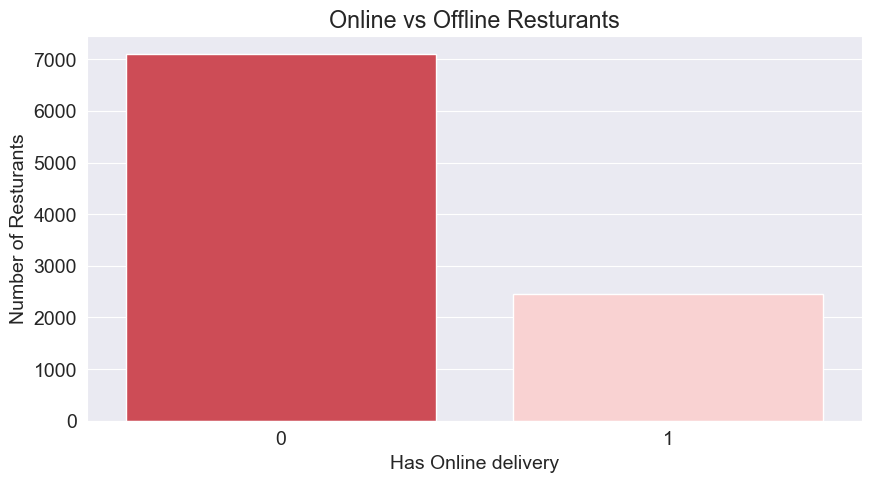

In [110]:
sns.countplot('Has Online delivery', data=zomato,palette=['#E23744',"#ffcccc"]);
plt.title('Online vs Offline Resturants');
plt.ylabel('Number of Resturants');

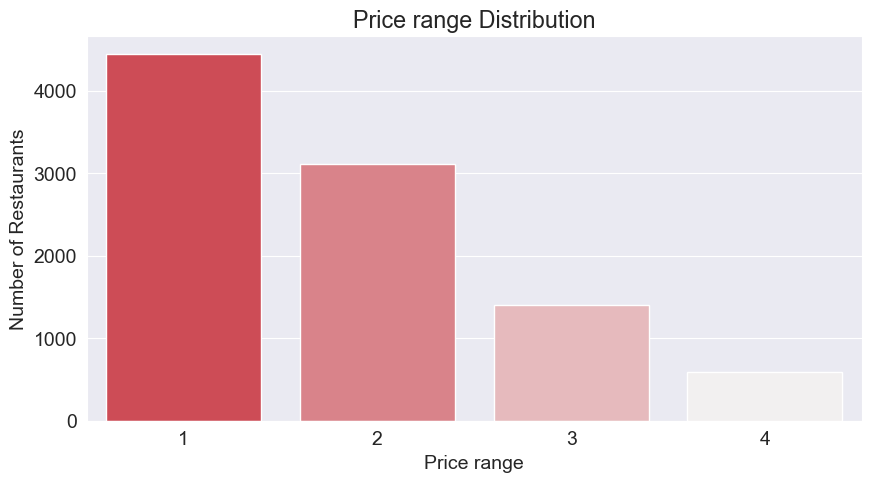

In [111]:
sns.countplot('Price range', data=zomato,palette='light:#E23744_r');
plt.title('Price range Distribution');
plt.ylabel('Number of Restaurants');

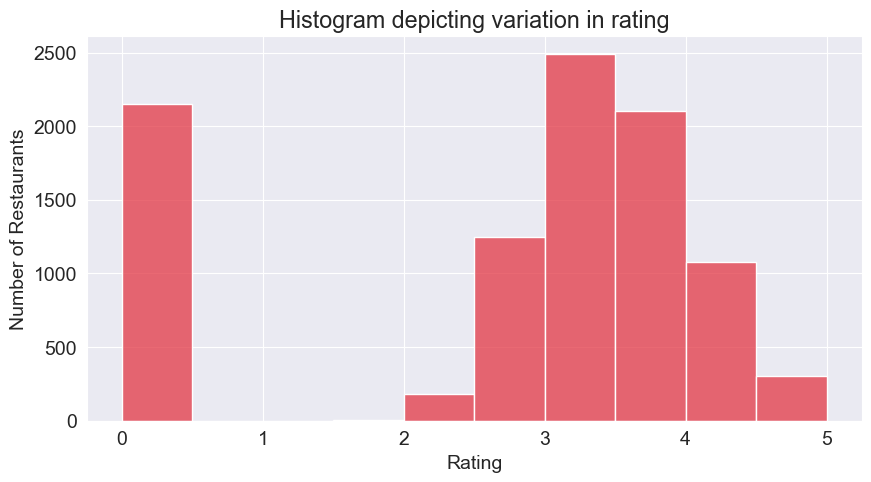

In [113]:
plt.title('Histogram depicting variation in rating')

sns.histplot(x='Aggregate rating', data=zomato,color='#E23744',binwidth=0.5)
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.show()

Text(0, 0.5, 'Number of Restaurants')

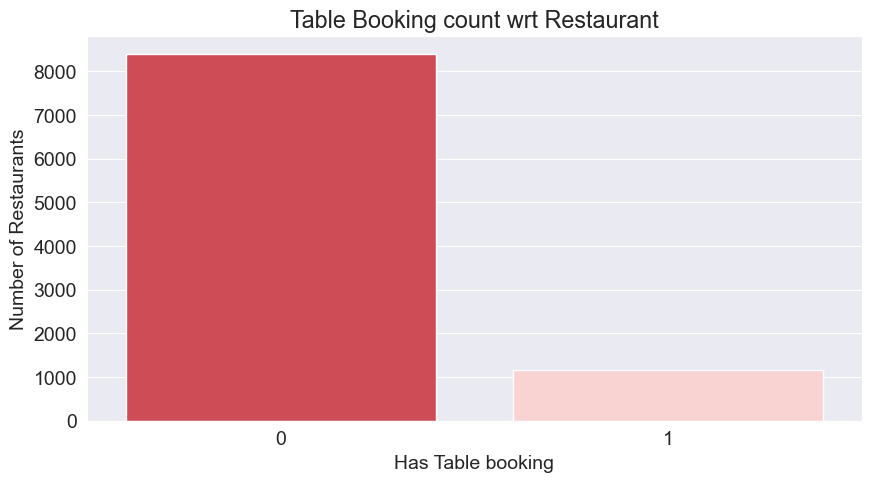

In [114]:
sns.countplot('Has Table booking',data=zomato,palette=['#E23744',"#ffcccc"]);
plt.title('Table Booking count wrt Restaurant');
plt.ylabel('Number of Restaurants')

Text(0, 0.5, 'Number of Restaurants')

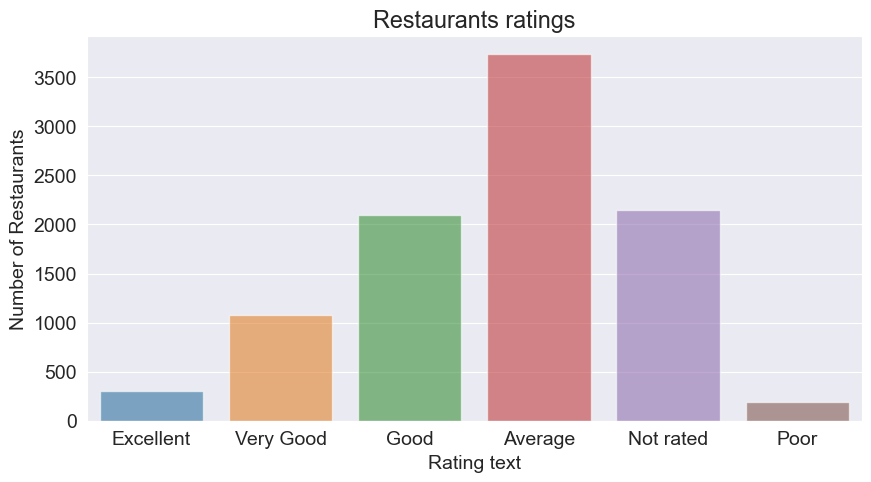

In [117]:
sns.countplot(zomatoDF['Rating text'],alpha=0.6);
plt.title('Restaurants ratings');
plt.ylabel('Number of Restaurants')

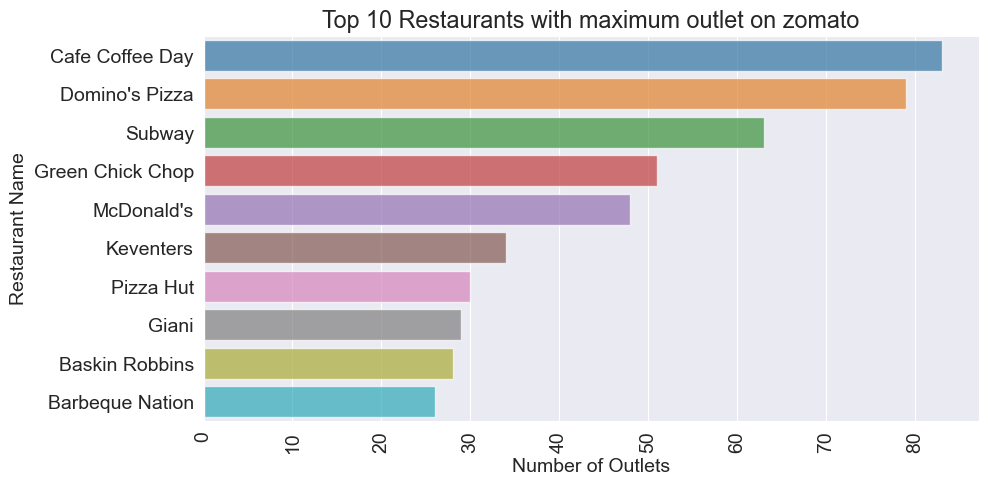

In [132]:
Restaurants = zomato.groupby(['Restaurant Name'],as_index=False)['Restaurant ID'].count()
Restaurants.columns = ['Restaurant Name','Number of Outlets']

Top10=Restaurants.sort_values('Number of Outlets', ascending=False).head(10)

sns.barplot(Top10['Number of Outlets'],Top10['Restaurant Name'],alpha=0.7);
plt.title('Top 10 Restaurants with maximum outlet on zomato');
plt.xticks(rotation = 90);

In [134]:
poor_rating_cities = zomato.groupby(['City'],as_index=False)['Aggregate rating'].mean().sort_values('Aggregate rating').head(10)

In [135]:
poor_rating_cities

City  Aggregate rating
43    Faridabad          1.866932
89        Noida          2.036204
78    Mc Millan          2.400000
83    Montville          2.400000
88    New Delhi          2.438845
97  Paynesville          2.600000
50      Gurgaon          2.651431
48    Ghaziabad          2.852000
77     Mayfield          2.900000
32      Consort          3.000000

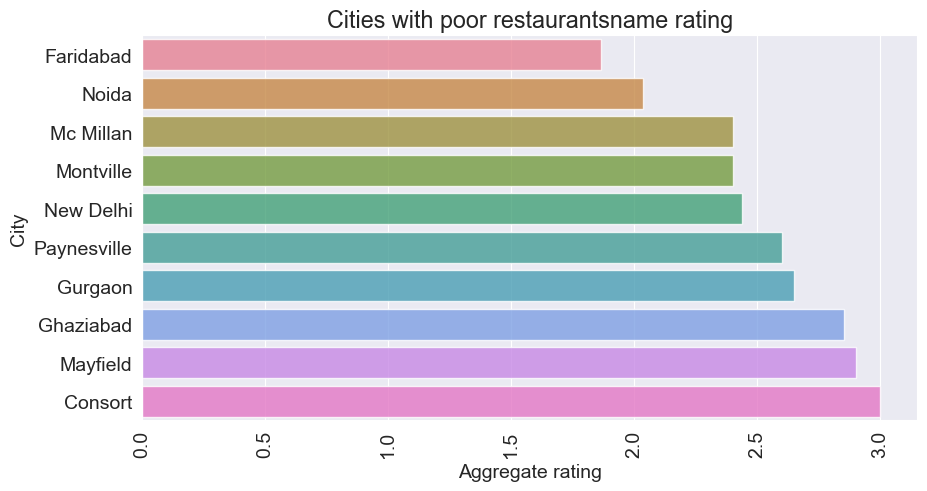

In [136]:
sns.barplot(poor_rating_cities['Aggregate rating'],poor_rating_cities['City'],alpha=0.8,palette='husl')
plt.title('Cities with poor restaurantsname rating')
plt.xticks(rotation = 90);

In [137]:
poor_offline_restaurants = zomato[(zomato['Has Online delivery'] == 0) & (zomato['Aggregate rating']<2.5)].head(10)
poor_offline_restaurants[['Restaurant Name', 'City']]

Restaurant Name            City
30          Sandubas Cafí©       Brasí_lia
58   Quiosque Chopp Brahma  Rio de Janeiro
69        Cantinho da Gula      Sí£o Paulo
77           Divino Fogí£o      Sí£o Paulo
78             Super Grill      Sí£o Paulo
233            Frick's Tap       Davenport
234             Los Agaves       Davenport
303           Troll Tavern     Gainesville
327    Triangle Restaurant       Mc Millan
389             Nosh Mahal       Pocatello